# Bayesian Regression
----------------------------------------------------
Machine Learning    

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es*, *Emilio Parrado Hernández emipar@tsc.uc3m.es* and *Pablo M. Olmos olmos@tsc.uc3m.es*

----------------------------------------------------



In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 1. Review of previous concepts

## 1.1. Review of Gaussian probability density functions

### 1-dimensional case:
If $x \sim \mathcal N(m,\sigma^2)$, then
$$
p(x|m,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-m)^2}{2\sigma^2}\right)
$$


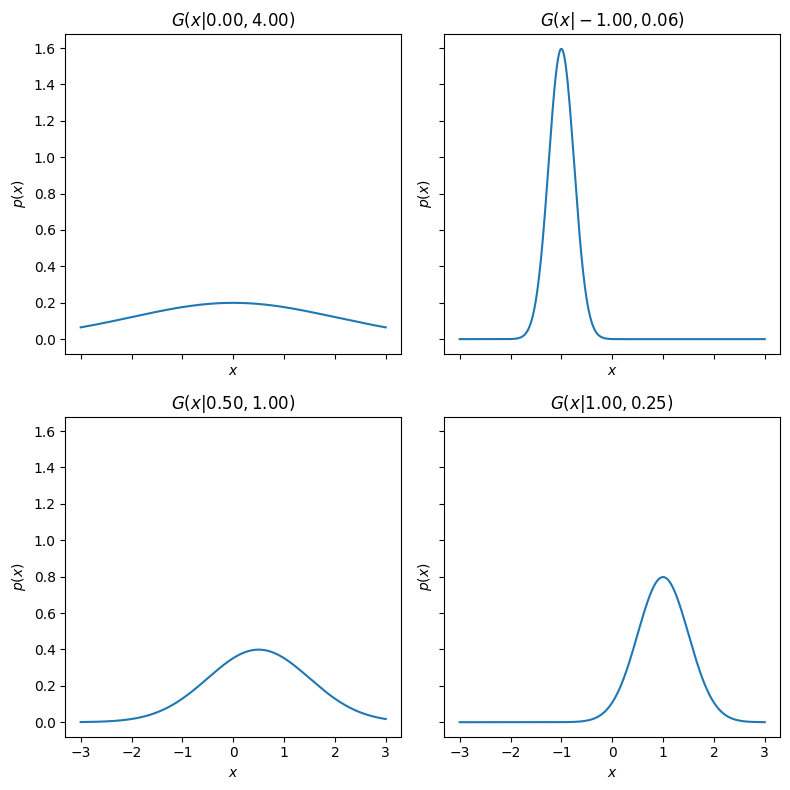

In [ ]:
from scipy.stats import norm
ncol=2
nrow=2
v_m = [0,-1,0.5,1]
v_s = [2, 0.25, 1, 0.5]
ff,aa = plt.subplots(nrow, ncol,figsize=(4*ncol, 4*nrow),sharex=True, sharey=True)

x=np.linspace(-3,3,500)
kk = 0
for rr in range(nrow):
  for cc in range(ncol):
    ak = aa[rr][cc]
    ak.plot(x, norm.pdf(x, loc=v_m[kk], scale=v_s[kk]))
    ak.set_title('$G(x|{0:.2f},{1:.2f})$'.format(v_m[kk], v_s[kk]**2))
    ak.set_xlabel('$x$')
    ak.set_ylabel('$p(x)$')
    kk += 1

ff.tight_layout()

### D-dimensional case:
If $\mathbf x \sim \mathcal N(\mathbf m,\Sigma)$, with ${\bf x}=[x_1, \ldots, x_D ]$ then
$$
p(\mathbf x|\mathbf m,\Sigma) = \frac{1}{\sqrt{(2\pi)^D|\Sigma|}}\exp\left(-\frac{1}{2}(\mathbf x-\mathbf m)^\top \Sigma^{-1}(\mathbf x-\mathbf m) \right)
$$

where $|\Sigma|$ is the **determinant** of $\Sigma$ and $D$ is the dimensionality of the observations.

$\Sigma$ the covaraince matrix

In [ ]:
from scipy.stats import multivariate_normal
def draw_Gauss_2d(ax, xmin=-1, xmax=1, ymin=-1, ymax=1, m=np.zeros(2), S=np.eye(2)):
  npoints=100
  Xg = np.linspace(xmin-.05*np.absolute(xmin),
                   xmax + .05*np.absolute(xmax),
                   npoints) # or whatever values for x

  Yg = np.linspace(ymin-.05*np.absolute(ymin),
                   ymax + .05*np.absolute(ymax),
                   npoints)   # or whatever values for y
  X, Y = np.meshgrid(Xg, Yg)
  Xshape = X.shape

  x_test = np.hstack((X.reshape(-1,1), Y.reshape(-1,1)))
  rv = multivariate_normal(m, S)
  zz = rv.pdf(x_test)
  zz = zz.reshape(Xshape)
  return ax.contourf(X, Y, zz, alpha=0.2, cmap='PuOr')

Gaussian: 0
Mean
[0, 0]
Covariance
[[1. 0.]
 [0. 1.]]

Gaussian: 1
Mean
[-0.5, -0.5]
Covariance
[[3, 0], [0, 1]]

Gaussian: 2
Mean
[-0.5, 1]
Covariance
[[1, 0.8], [0.8, 1]]

Gaussian: 3
Mean
[0.5, 0.5]
Covariance
[[1, -0.85], [-0.85, 1]]



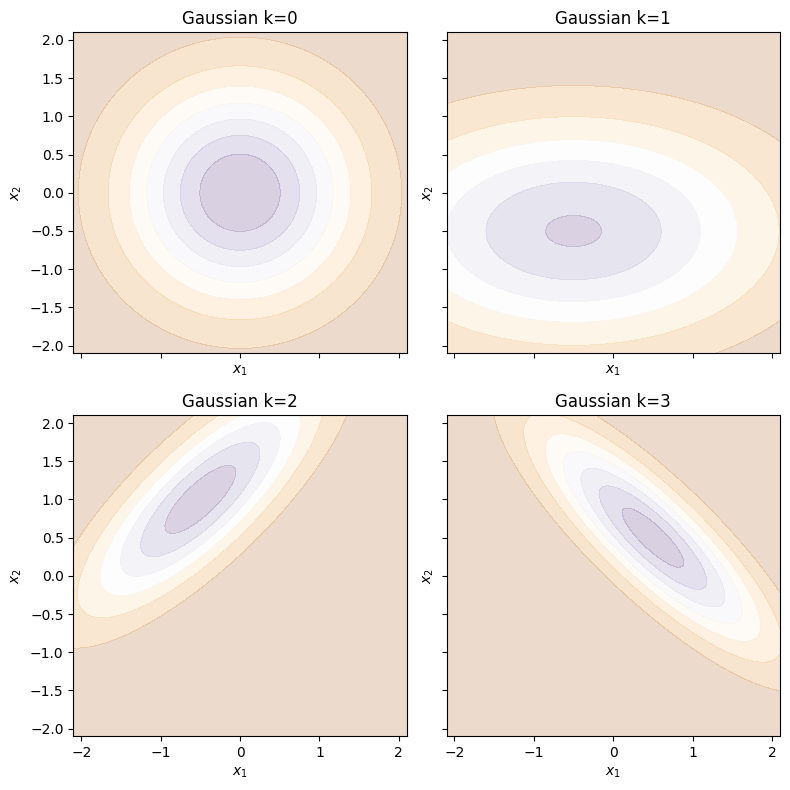

In [ ]:
ncol=2
nrow=2
d_m = {0:[0,0], 1:[-.5,-.5], 2:[-.5,1], 3:[.5,.5]}
d_S = {0:np.eye(2), 1:[[3,0],[0,1]], 2:[[1,0.8],[0.8,1]], 3:[[1,-0.85],[-0.85,1]]}
ff,aa = plt.subplots(nrow, ncol,figsize=(4*ncol, 4*nrow),sharex=True, sharey=True)


kk = 0
for rr in range(nrow):
  for cc in range(ncol):
    ak = aa[rr][cc]
    draw_Gauss_2d(ak, -2,2,-2,2,d_m[kk], d_S[kk])
    ak.set_xlabel('$x_1$')
    ak.set_ylabel('$x_2$')
    ak.set_title('Gaussian k={0:d}'.format(kk))
    kk += 1

ff.tight_layout()
for kk in range(len(d_m.items())):
  print("Gaussian: {0:d}".format(kk))
  print("Mean")
  print(d_m[kk])
  print("Covariance")
  print(d_S[kk])
  print("")

matrix cOv : primer valor de la primera es la vaianza y el segundo es la covarianza y el segundo valor es la varianza de la segunda y la primera es la cov de la segunda,
If the Cov is zero and they arer gaussian, they are independent.

Gaussian 2 y 3 dependent. Gaussian 0 y 1 independent.

### Gaussian pdf transformations

- **Sum of Gaussian** pdfs gives a Gaussian pdf. Consider that we have $n$ multivariate Gaussian random variables: $\mathbf x_i \sim \mathcal N(\mathbf m_i,\Sigma_i)$, $i=1,\dots,n$. Then
$$
\mathbf y=\sum_{i=1}^n \mathbf x_i \sim \mathcal N(\mathbf m_{\mathbf y}, \Sigma_{\mathbf y})
$$ where
  - $\mathbf m_{\mathbf y} = \sum_{i=1}^n \mathbf m_i$
  - if the $\mathbf x_i$ are independent then $\Sigma_{\mathbf y} = \sum_{i=1}^{n}\Sigma_i$
- **Scaling a Gaussian** gives also a Gaussian. If $\mathbf  x\sim \mathcal N(\mathbf m,\Sigma)$, then
$$\mathbf y = A \mathbf x \sim \mathcal N(A\mathbf m, A\Sigma A^\top) $$

- Therefore a **linear combination of Gaussian pdfs is also Gaussian**.

#### Some examples:
- Gaussian 1:
$$
\mathbf X = \left[\begin{array}{c}x_1\\x_2\end{array}\right] \sim \mathcal N \left(\left [\begin{array}{c}0\\0\end{array}\right] , \left [\begin{array}{cc}1 & 0\\0& 1\end{array}\right]\right)
$$

- Gaussian 2:
$$
\mathbf Y = \left[\begin{array}{c}y_1\\y_2\end{array}\right] = \mathbf X + \left[\begin{array}{c}0.5\\ 0.5 \end{array}\right] \sim \mathcal N \left(\left [\begin{array}{c}0.5\\0.5\end{array}\right] , \left [\begin{array}{cc}1 & 0\\0& 1\end{array}\right]\right)
$$

- Gaussian 3:
$$
\mathbf Z = \left[\begin{array}{c}z_1\\z_2\end{array}\right] =  \left[\begin{array}{cc}1 & 0.03\\ 0.3 & 1 \end{array}\right]\mathbf X  \sim \mathcal N \left(\left [\begin{array}{c}0\\0\end{array}\right] , \left[\begin{array}{cc}1 & 0.03\\ 0.3 & 1 \end{array}\right]\left [\begin{array}{cc}1 & 0\\0& 1\end{array}\right]\left[\begin{array}{cc}1 & 0.03\\ 0.3 & 1 \end{array}\right]^\top\right)
$$

- Gaussian 4:
$$
\mathbf V = \left[\begin{array}{c}v_1\\v_2\end{array}\right] =  \mathcal N \left(\left [\begin{array}{c}0.5\\0.5\end{array}\right] , \left [\begin{array}{cc}1 & 0\\0& 1\end{array}\right] \right)  + \left[\begin{array}{cc}1 & 0.03\\ 0.3 & 1 \end{array}\right] \mathcal N \left(\left [\begin{array}{c}0\\0\end{array}\right] ,\left [\begin{array}{cc}1 & 0\\0& 1\end{array}\right]\right) \sim \mathcal N \left(\left [\begin{array}{c}0.5\\0.5\end{array}\right] , \left[\begin{array}{cc}1 & 0.03\\ 0.3 & 1 \end{array}\right]\left [\begin{array}{cc}1 & 0\\0& 1\end{array}\right]\left[\begin{array}{cc}1 & 0.03\\ 0.3 & 1 \end{array}\right]^\top + \left [\begin{array}{cc}1 & 0\\0& 1\end{array}\right] \right)
$$

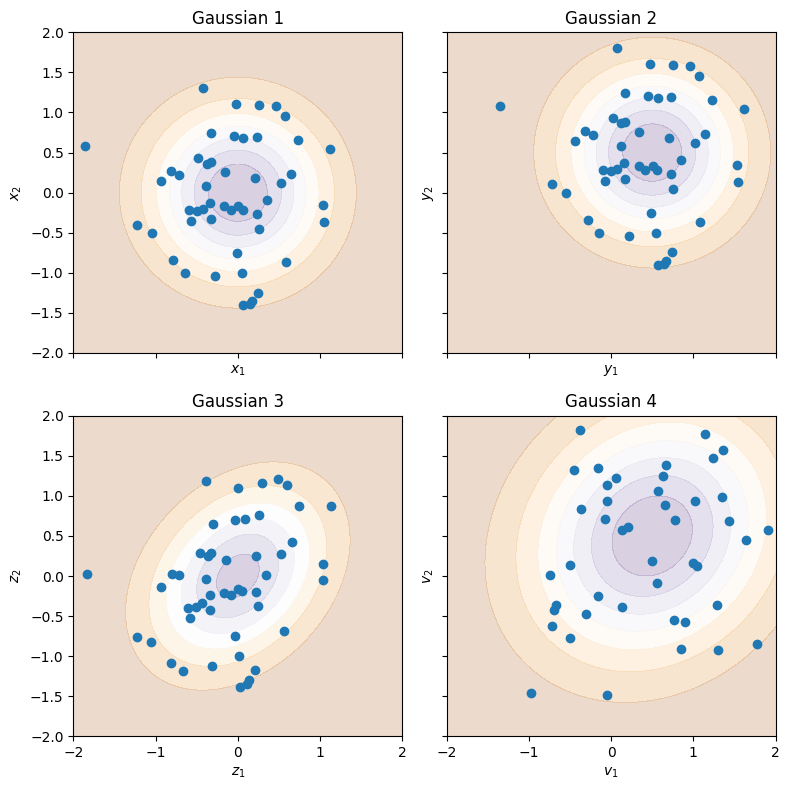

In [ ]:
ncol=2
nrow=2
d_m = {0:[0,0], 1:[-.5,-.5], 2:[-.5,1], 3:[.5,.5]}
d_S = {0:np.eye(2), 1:[[3,0],[0,1]], 2:[[1,0.8],[0.8,1]], 3:[[1,-0.85],[-0.85,1]]}
ff,aa = plt.subplots(nrow, ncol,figsize=(4*ncol, 4*nrow),sharex=True, sharey=True)

lista_aa = []
for rr in range(nrow):
  for cc in range(ncol):
    lista_aa.append(aa[rr][cc])

kk = 0
ak = lista_aa[kk]
mm = d_m[0]
SS = d_S[0]*0.5
draw_Gauss_2d(ak, -2,2,-2,2, mm, SS)
rv = multivariate_normal(mm, SS)
zz = rv.rvs(size=50, random_state=42)
ak.scatter(zz[:,0], zz[:,1], marker='o')
ak.set_xlabel('$x_1$')
ak.set_ylabel('$x_2$')
ak.set_title('Gaussian 1')
ak.axis([-2,2,-2,2])
kk += 1

ak = lista_aa[kk]
mm = [0.5,0.5]
draw_Gauss_2d(ak, -2,2,-2,2, mm, SS)
zz1 = zz + np.array(mm)
ak.scatter(zz1[:,0], zz1[:,1], marker='o')
ak.set_xlabel('$y_1$')
ak.set_ylabel('$y_2$')
ak.set_title('Gaussian 2')
ak.axis([-2,2,-2,2])
kk += 1
ff.tight_layout()

ak = lista_aa[kk]
mm = d_m[0]
A=np.array([[1, 0.03],[0.3,1]])
S = A.dot(np.array(SS)).dot(A.T)
draw_Gauss_2d(ak, -2,2,-2,2, mm, S)
zz2 = zz.dot(A.T)
ak.scatter(zz2[:,0], zz2[:,1], marker='o')
ak.set_xlabel('$z_1$')
ak.set_ylabel('$z_2$')
ak.set_title('Gaussian 3')
ak.axis([-2,2,-2,2])
kk += 1

ak = lista_aa[kk]
mm = [0.5,0.5]
A=np.array([[1, 0.03],[0.3,1]])
S = A.dot(np.array(SS)).dot(A.T)
draw_Gauss_2d(ak, -2,2,-2,2, mm, S+SS)
zz1 = multivariate_normal(mm, SS).rvs(size=50, random_state=42)
zz2 = multivariate_normal([0.,0.], S).rvs(size=50, random_state=44)
zz3 = zz1 + zz2
ak.scatter(zz3[:,0], zz3[:,1], marker='o')
ak.set_xlabel('$v_1$')
ak.set_ylabel('$v_2$')
ak.set_title('Gaussian 4')
ak.axis([-2,2,-2,2])
kk += 1
ff.tight_layout()

### Marginals and conditionals of a multivariate Gaussian
Consider a joint multidimensional Gaussian pdf where the variables are grouped in two arrays $\mathbf x_1$ and $\mathbf x_2$
$$
p(\mathbf x|\mathbf m, \mathbf \Sigma) = \mathcal N(\mathbf x|\mathbf m, \mathbf \Sigma) = p\left( \left[ \begin{array}{c}\mathbf x_1 \\ \mathbf x_2 \end{array} \right]\right ) = \mathcal N \left( \left[\begin{array}{c}\mathbf m_1 \\ \mathbf m_2 \end{array}\right],\left[\begin{array}{cc}\Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{array}\right] \right )
$$
- **Marginal densities**
$$
p(\mathbf x_i) = \mathcal N(\mathbf m_i, \Sigma_{ii}), \quad i=1,2
$$
- **Conditional densities**
$$
p(\mathbf x_i|\mathbf x_j) = \mathcal N\left (\mathbf x_i| \mathbf m_i + \Sigma_{ij}\Sigma_{jj}^{-1}(\mathbf x_j-\mathbf m_j),\Sigma_{ii}-\Sigma_{ij}\Sigma_{jj}^{-1}\Sigma_{ji}\right)
$$

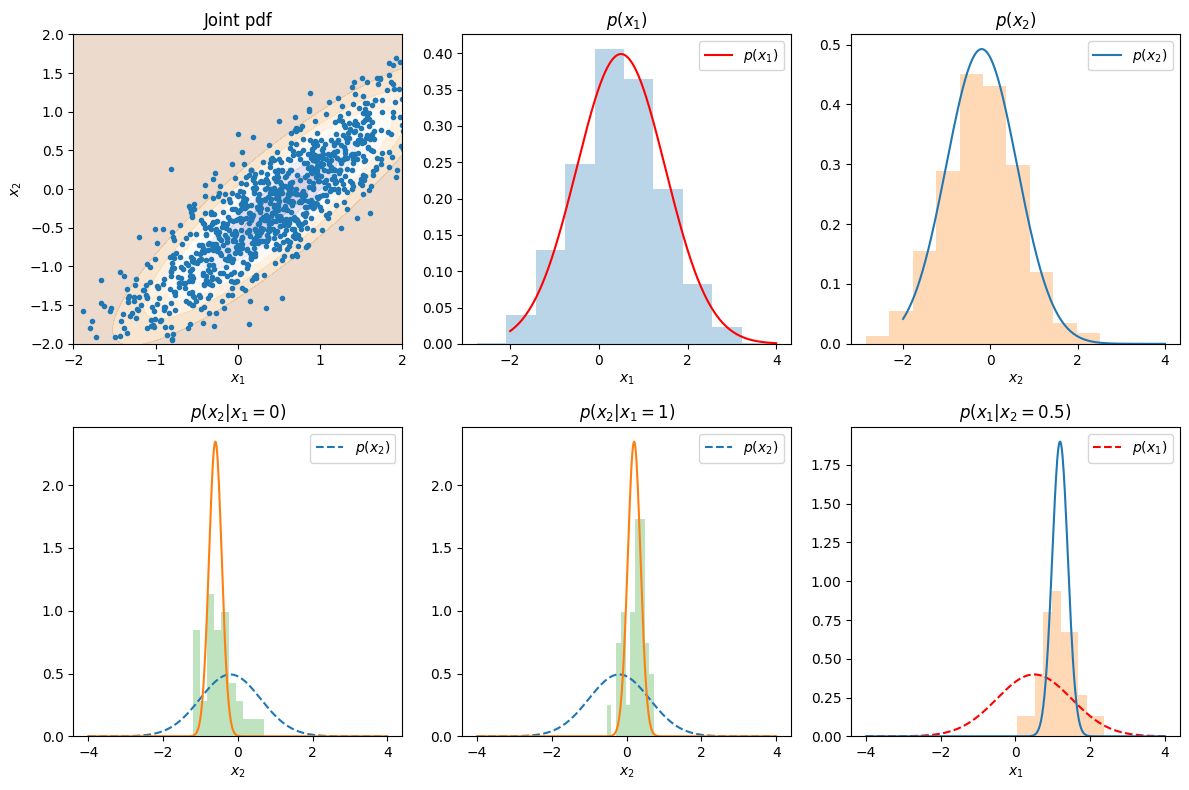

In [ ]:
ncol=3
nrow=2
m = np.array([0.5,-0.2])
S = np.array([[1,0.8],[0.8,0.81]])
ff,aa = plt.subplots(nrow, ncol,figsize=(4*ncol, 4*nrow))
lista_aa = []
for rr in range(nrow):
  for cc in range(ncol):
    lista_aa.append(aa[rr][cc])

x=np.linspace(-2,4,500)

kk = 0
ak = lista_aa[kk]
draw_Gauss_2d(ak, -2,2,-2,2, m, S)
rv = multivariate_normal(m, S)
zz = rv.rvs(size=1000, random_state=42)
ak.scatter(zz[:,0], zz[:,1], marker='.')
ak.set_xlabel('$x_1$')
ak.set_ylabel('$x_2$')
ak.set_title('Joint pdf')
ak.axis([-2,2,-2,2])
kk += 1

ak = lista_aa[kk]
ak.plot(x, norm.pdf(x, loc=m[0], scale=S[0,0]), color='red', label='$p(x_1)$')
ak.hist(zz[:,0], density=True,alpha=0.3)
ak.set_title('$p(x_1)$')
ak.set_xlabel('$x_1$')
ak.legend()
kk += 1

ak = lista_aa[kk]
ak.plot(x, norm.pdf(x, loc=m[1], scale=S[1,1]), label='$p(x_2)$')
ak.hist(zz[:,1], density=True,alpha=0.3)
ak.set_title('$p(x_2)$')
ak.set_xlabel('$x_2$')
ak.legend()
kk += 1
x=np.linspace(-4,4,500)
ak = lista_aa[kk]
ak.plot(x, norm.pdf(x, loc=m[1], scale=S[1,1]), linestyle='--', label='$p(x_2)$')
ak.plot(x, norm.pdf(x, loc=m[1]-S[0,1]/S[0,0]*m[0], scale=S[1,1]-S[0,1]**2/S[0,0]))
ak.hist(zz[(-0.05<zz[:,0]) & (zz[:,0]<0.05) ,1], density=True,alpha=0.3)
ak.set_title('$p(x_2|x_1=0)$')
ak.set_xlabel('$x_2$')
ak.legend()
kk += 1
x=np.linspace(-4,4,500)
ak = lista_aa[kk]
ak.plot(x, norm.pdf(x, loc=m[1], scale=S[1,1]), linestyle='--', label='$p(x_2)$')
ak.plot(x, norm.pdf(x, loc=m[1]+S[0,1]/S[0,0]*(1-m[0]), scale=S[1,1]-S[0,1]**2/S[0,0]))
ak.hist(zz[(1-0.05<zz[:,0]) & (zz[:,0]<1+0.05) ,1], density=True,alpha=0.3)
ak.set_title('$p(x_2|x_1=1)$')
ak.set_xlabel('$x_2$')
ak.legend()
kk += 1
x=np.linspace(-4,4,500)
ak = lista_aa[kk]
ak.plot(x, norm.pdf(x, loc=m[0], scale=S[0,0]), linestyle='--', color='red', label='$p(x_1)$')
ak.plot(x, norm.pdf(x, loc=m[0]+S[0,1]/S[1,1]*(.5-m[1]), scale=S[0,0]-S[0,1]**2/S[1,1]))
ak.hist(zz[(0.5-0.05<zz[:,1]) & (zz[:,1]<0.5+0.05) ,0], density=True,alpha=0.3)
ak.set_title('$p(x_1|x_2=0.5)$')
ak.set_xlabel('$x_1$')
ak.legend()
ff.tight_layout()

x1 and x2 are correlated becuse the plot of the joint pdf would be sperical.

how we can see the conditional pdf? We fix x1=1 and plot a line in x1=1 and analyze the mean and variance over this line.

## 1.2. Review of linear regression


Consider we have a **training** database of $N$ entries of the form $(\mathbf{x}^{(i)},y^{(i)})$, where $\mathbf{x}^{(i)}\in\mathbb{R}^D$ are the observations and $y^{(i)}\in\mathbb{R}$ are their associated target values.  

Let's consider the following **linear** model:

$$f(\mathbf{x}) =  w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_D x_D = \mathbf{w}^T\mathbf{x}$$

where $\mathbf{x}$ can be an extended version to modelate the model bias. The optimal value of $\mathbf{w}$ can be found as the solution of

$$\mathbf{w}^* = \arg \min_{\mathbf{w}} \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^T\mathbf{x}^{(i)})^2 $$

which is given by the **least-squares** or the **normal equation**:

$$\mathbf{w}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y},$$

To avoid overtiffing problems, we can add a $L_2$ regulation term to cost function to be minimized, obtaining the **Ridge regression** model

$$\mathbf{w}_\alpha = \arg \min_{\mathbf{w}} \frac{1}{N} \left[\sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^T\mathbf{x}^{(i)})^2 + \alpha \sum_{j=1}^{D} {w}_j^2\right],$$
whose solution is given by:

$$\mathbf{w}_\alpha = (\mathbf{X}^T\mathbf{X} + \alpha \mathbf{I}_{D\times D})^{-1}\mathbf{X}^T\mathbf{y},$$


## 1.3 Review of probabilistic and bayesian estimation

### Problem definition

* Unknown parameter $\theta$
* We observe some related random variable $\mathbf x=[x_1, \ldots, x_D]$.
* We want to estimate  $\theta$ from $\mathbf x$




### Maximum likelihood estimation

If the model allows us to define the likelihood of $\theta$, i.e., $ p(\mathbf x| \theta) $, we can carry out a **Maximum likelihood** estimation:

$$ \theta_{ML}= {\rm argmax}_{\theta} p(\mathbf x| \theta)$$


### Bayesian estimation

In case we have prior information about $\theta$, we can include this information in our evidence and carry out a bayesian estimation by combining the likelihood information and the prior knowledge to obtain the posterior distribution of $ \theta$, i.e.,

$$p( \theta|\mathbf x) = \frac{p(\mathbf x| \theta) p( \theta)}{p(\mathbf x)} $$

This distribution provides all the needed information about the behavious of $\theta$. We can combine it with different cost functions to obtain different estimations of $\theta$. For instance:

* MAP estimator: directly the maximum of the posterior distribution
$$ \theta_{MAP}= {\rm argmax}_{\theta} p( \theta|\mathbf x)$$
* MSE estimator: if we wanted to minimize the mean square error, the MSE estimator is
$$ \theta_{MSE}= \mathbb E \{\theta|\mathbf x \}$$
* MAD estimator: if we wanted to minimize the mean absolute error, the MSE estimator is:
$$ \theta_{MAD}= {\rm median} \{ p( \theta|\mathbf x)\}$$

Advice: compute the posterior distribution because it provides everything.

We can use MAP, MSE and MAD but depends on the prpblem. In our case, nos da igual, nos interesa la posterior disribution

# 2. Probabilistic formulation of the Linear Regression problem



## 2.1 Problem modelling
The linear regression model can be reviewed under a probabilistic interpretation.

- Data: $\mathcal D:\{(\mathbf x_i, y_i)_{i=1}^N \}$, where $\mathbf x_i \in \mathbb R^D$ are **independently** observed inputs and $y_i\in \mathbb R$ are the corresponding targets.
- Compactly, $X$ is a $N\times D$ matrix with the $N$ observations (each data is a row); and $\mathbf y$ is a $N$ dimensional vector  with their associated targets.
- **Linear model**
$$
f(\mathbf x) = \mathbf w^\top \mathbf x
$$ notice that if $\mathbf w$ and $\mathbf x $ are known,  $f$ is deterministic. Any possible bias term is included in $\mathbf x$.
- The targets are obtained by adding a gaussian noise in the model:
$$
 y = f(\mathbf x) +  \epsilon
$$
where $ \epsilon \sim \mathcal N(0,\sigma_n^2)$.
- The **goal** is to learn $\mathbf w$ from data in order to have the model completely characterized.

we consider that the noise follows a gaussian with zero mean and a variance

## 2.2 Generative model

The above model is defining the **data generation process**. For a given model parameters (this model only depends on two parameters), that is:
- A value of $\mathbf w$
- A value of $\sigma_n$


We can generate a data set following this procedure
1. Get the observation $\mathbf x$
2. Get $f(\mathbf x) = \mathbf w^\top \mathbf x $
3. Draw a noise observation $\epsilon$ from the noise pdf: $ \epsilon \sim \mathcal N(0,\sigma_n^2)$
4. Get $y = f(\mathbf x) +  \epsilon$
5. Loop 1-4 $N$ times until you get the whole dataset



#### Data generation process for a toy problem

*In a real world scenario you will not have access to this part of the process. Here it is open so that you can evaluate the learning process.*

##### True data model
$$
y = a_1 x + a_0 + \epsilon
$$
where:
- observations $x \in [-1,1]$
- $a_1 = 0.5$
- $a_0 = -0.3$
- $\epsilon \sim \mathcal N(0,\sigma_n^2)$ with  $\sigma_n=0.2$

Assume there is a black-box process that provides us with data following this model, but you can never access the inside of the black-box.

In [ ]:
import random

random.seed(42)
def get_observation():
  a1 = 0.5
  a2 = -0.3
  sigma_n = 0.2
  x = random.uniform(-1,1)
  ee = random.gauss(mu=0, sigma=sigma_n)
  return x, a1*x + a2 + ee

real life: we don't know what has generate the data!!!!



## 2.3 Learning the model

Learning the model in a probabilistic framework involves deconstructing the data generation process to find out the values of the model parameters $\mathbf w$ and $\sigma_n$ that were used to generate the data.

If you **believe** the model is correct, then the strategy to learn the optimum values for the parameters is to maximize the probability that your model generated the training observations -> maximize the likelihood of $\mathbf w$ and $\sigma_n$.


#### Likelihood of the observations

- Likelihood of individual observations
$$
p(y_i|\mathbf x_i, \mathbf w, \sigma_n) \sim \mathcal N(\mathbf w^\top \mathbf x_i, \sigma_n^2)
$$
- Likelihood of the jointly observed independent data $(X,\mathbf y) $
$$
p(\mathbf y|X,\mathbf w, \sigma_n) = \prod_{i=1}^n p(y_i|\mathbf x_i, \mathbf w) \sim \mathcal N(X\mathbf w, \sigma_n^2 \mathbf I)
$$ where $\mathbf I$ is the $N\times N$ identity matrix

to apply a Max likelihood we need the likelihood of w --> p(y,x/w); y deends on w, but x not, so p(y/x,w)* p(x/w), but the last term can be canceled so, p(y/x,w)

#### ML estimation for the toy problem


You first assume a linear model can serve for solving the problem. Therefore you need to find the parameters $w_1$ and $w_0$ such that

$$
y \approx w_1 x + w_0 = \left[\begin{array}{cc}w_1 & w_0\end{array}\right] \left[\begin{array}{c}x\\1\end{array}\right] = \mathbf w^\top \mathbf x
$$ is a good approximation for the observations you are receiving.



If your learning is successful, $w_1$ and $w_0$ should end close  to the true values $a_1$ and $a_0$.

Since you assume there will be some noise in the data, you need to set a value for $\sigma_n$. Let's assume first you were right with your assumption and $\sigma_n=0.2$ was your choice.


In [ ]:
def draw_likelihood_2d_joint(ax, xmin=-1, xmax=1, ymin=-1, ymax=1, x=0, y=0,sigma=1):
  npoints=100
  W1g = np.linspace(xmin-.05*np.absolute(xmin),
                   xmax + .05*np.absolute(xmax),
                   npoints) # or whatever values for x

  W0g = np.linspace(ymin-.05*np.absolute(ymin),
                   ymax + .05*np.absolute(ymax),
                   npoints)   # or whatever values for y
  W1, W0 = np.meshgrid(W1g, W0g)
  Xshape = W1.shape

  zz = np.ones(Xshape)
  for (x_i,y_i) in zip(x,y):
    x_test = W1.reshape(-1,1)*x_i + W0.reshape(-1,1)
    zz_i = norm.pdf(x_test, loc=y_i,scale=sigma)
    zz_i = zz_i.reshape(Xshape)
    zz = zz*zz_i
  return ax.contourf(W1, W0, zz, alpha=0.2, cmap='PuOr')

In [ ]:
def plot_ML_solution(X,Y, sigma_n=0.2):

  fa, aa = plt.subplots(1,2,figsize=(8,4))
  ak = aa[0]
  draw_likelihood_2d_joint(ak, -1,1,-1,1, X, Y, sigma_n)
  ak.set_title('ML distribution')

  ak = aa[1]
  xg = np.linspace(-1,1,3)
  # ML solution
  X = np.array(X)
  X_e = np.concatenate((np.ones((X.shape[0],1)), X[:,None]) , axis=1)
  wML = np.linalg.pinv(X_e)@Y
  yg = xg*wML[1] + wML[0]
  ak.plot(xg, yg, label = 'ML solution')
  # Real model
  yg = xg*0.5 -0.3
  ak.plot(xg, yg,'--', color='black', label='Real model')

  ak.set_xlabel('x')
  ak.set_ylabel('y')
  ak.scatter(X,Y,marker='o', color='cyan', label='Observations')
  #ak.scatter(x, y, marker='o')
  ak.legend()
  ak.set_title('Model by ML estimation')
  fa.tight_layout()

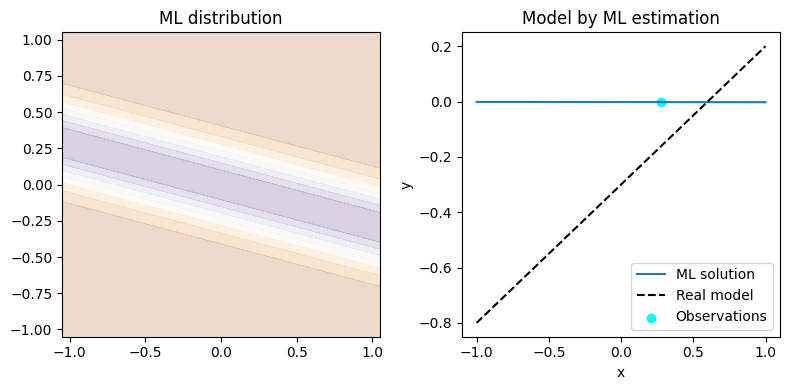

In [ ]:
# Run this cell several times and analyze the different solutions
X = []
Y = []
x, y = get_observation()
X.append(x)
Y.append(y)

plot_ML_solution(X,Y)

izq: Max Likelihood for 1 data. Any of the points in the violet are maximize the likelihood.
dcha: the ML solution and my single data. Input/output relationship,

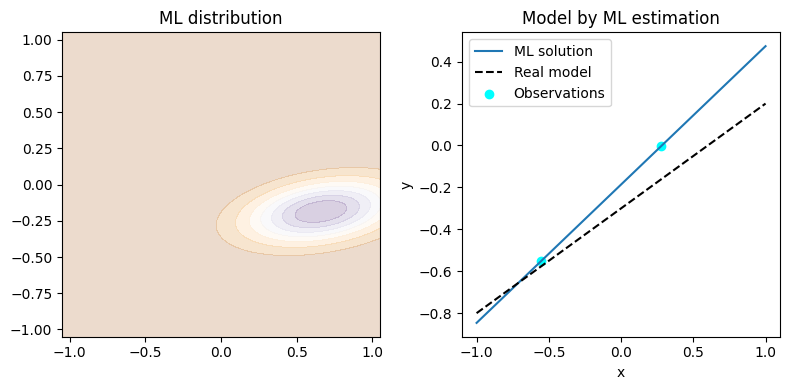

In [ ]:
x, y = get_observation()
X.append(x)
Y.append(y)

plot_ML_solution(X,Y)

Izq: My ML solution is in the purple area.

Goal:tell me the values of y that are more likely to obtain these observations

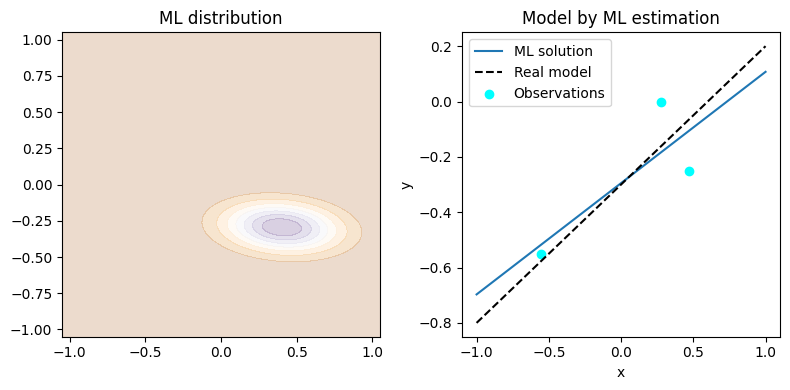

In [ ]:
x, y = get_observation()
X.append(x)
Y.append(y)

plot_ML_solution(X,Y)

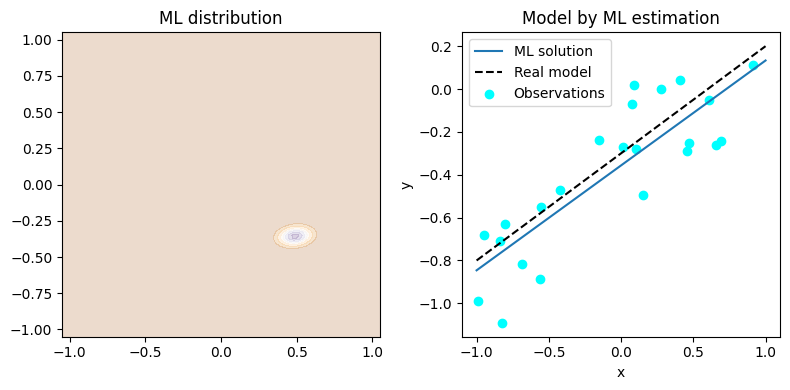

In [ ]:
for iteration in range(20):
  x, y = get_observation()
  X.append(x)
  Y.append(y)

plot_ML_solution(X,Y)

when we increase the number of data my ML is more peacky.

## 2.4 Maximum likelihood solution

To find the ML estimations of $\mathbf w$ and $\sigma_n$, we have to solve the following problem:

$$ \max_{\mathbf w, \sigma_n} p(\mathbf y|X,\mathbf w, \sigma_n) = \max_{\mathbf w, \sigma_n} \log p(\mathbf y|X,\mathbf w, \sigma_n) = \max_{\mathbf w, \sigma_n} \log \mathcal N(\mathbf y|X\mathbf w, \sigma_n^2 \mathbf I)
$$

Given the general expression of a multivariate Gaussian
$$
\mathcal N(\mathbf y| X\mathbf w, \sigma_n^2 \mathbf I) = \frac{1}{\sqrt{(2\pi)^d|\Sigma|}}\exp\left(-\frac{1}{2}(\mathbf y-\mathbf m)^\top \Sigma^{-1}(\mathbf y-\mathbf m) \right)$$
and replacing $\mathbf m = X\mathbf w$  and $\Sigma = \sigma_n^2 \mathbf I$, we have that
$$
\mathcal N(\mathbf y| X\mathbf w, \sigma_n^2 \mathbf I) = \frac{1}{\sqrt{(2\pi)^N}\sigma_n^N}\exp\left(-\frac{1}{2\sigma_n^2}(\mathbf y-X\mathbf w)^\top (\mathbf y-X\mathbf w) \right)
$$ where $\sqrt{|\Sigma|} = \sigma_n^N$ and $\Sigma^{-1} = \sigma_n^{-2} \mathbf I$. So
$$
\mathcal N(\mathbf y| X\mathbf w, \sigma_n^2 \mathbf I) = \frac{1}{\sqrt{(2\pi)^N}\sigma_n^N}\exp\left(-\frac{1}{2\sigma_n^2}(\mathbf y^\top \mathbf y -2\mathbf y^\top X\mathbf w + \mathbf w^\top X^\top X\mathbf w) \right)
$$

And its maximization, after taking the logarithm, becomes
$$
\max_{\mathbf w, \sigma_n} \log \mathcal N(X\mathbf w, \sigma_n^2 \mathbf I) = \max_{\mathbf w, \sigma_n} -\frac{N}{2}\log 2\pi- N\log \sigma_n - \frac{1}{2\sigma_n^2}(\mathbf y^\top \mathbf y -2\mathbf y^\top X\mathbf w + \mathbf w^\top X^\top X\mathbf w)
$$


#### ML estimation of $\mathbf w$.

To obtain the solution for $\mathbf w$, we set to $\mathbf 0$ the gradient of $\log p(\mathbf y|X,\mathbf w, \sigma_n) $ with respect to $\mathbf w$
$$
-2 X^\top \mathbf y + 2  X^\top X\mathbf w = 0
$$
Therefore
$$
\mathbf w_{ML} = (X^\top X)^{-1}X^\top \mathbf y
$$
which is the linear regression solution you already knew.


#### ML estimation of  $\sigma_n$

The probabilistic framework also enables us to find a value for the noise distribution parameter that maximises the probability of the model generating the observations (the likelihood of $\sigma_n$).

We set to 0 the derivative of $\log p(\mathbf y|X,\mathbf w, \sigma_n) $ wrt $\sigma_n$ when $\bf w = \bf w_{ML}$
$$
-\frac{N}{\sigma_n} +\frac{1}{\sigma_n^3} (\mathbf y^\top \mathbf y -2\mathbf y^\top X\mathbf w_{ML} + \mathbf w_{ML}^\top X^\top X\mathbf w_{ML})  = 0
$$
And solving for $\sigma_n$
$$
{\sigma_n}_{ML}^2 =  \frac{1}{N}(\mathbf y^\top \mathbf y -2\mathbf y^\top X\mathbf w_{ML} + \mathbf w_{ML}^\top X^\top X\mathbf w_{ML}) = \frac{1}{N}\sum_{i=1}^N{(y_i - \mathbf w_{ML}^\top\mathbf x_i)^2}
$$
we obtain that the ML estimation of $\sigma_n^2$ is the sample estimation of the square error between the observed targets and the noise-free model outputs.

## 2.5 Bayesian Linear Regression



### Introducing prior knowledge about $\mathbf w$

The Bayesian framework enables to refine our knowledge of $\mathbf w$ by introducing in the model **prior** information about the nature of $\mathbf w$ that we **know before accessing data**. This prior pdf of $\mathbf w$ is therefore independent of $X$.

In this case we **know** that $\mathbf w$ follows also a Gaussian distribution
$$
p(\mathbf w) \sim \mathcal N(\mathbf 0, \Sigma_p)
$$

How will this information change our strategy to find out  the model?

### The posterior distribution
The posterior distribution combines the information contained in the prior with the likelihood (information contained in the observations) through Bayes Theorem

$$
p(\mathbf w|X,\mathbf y) = \frac{p(\mathbf y|X,\mathbf w) p(\mathbf w|X)}{p(\mathbf y|X)} $$

- The prior term, as $\mathbf w$ and $X$ are **independent**, becomes
 $$
p(\mathbf w|X) = p(\mathbf w) \sim \mathcal N(\mathbf 0, \Sigma_p)
$$
- The normalising term can be computed as
$$
p(\mathbf y|X) = \int p(\mathbf y|\mathbf w, X)p(\mathbf w|X)d\mathbf w = \int p(\mathbf y|\mathbf w, X)p(\mathbf w)d\mathbf w
$$


This **posterior**  also follows a **Gaussian** pdf. Remember since all the involved random variables are Gaussian the joint distribution is Gaussian and therefore all the conditionals are Gaussian pdfs.
$$
p(\mathbf w|X,\mathbf y) \sim \mathcal N(\mathbf m_{\mathbf w}, \Sigma_{\mathbf w})
$$

#### Detailed posterior

Check section 2.3.3 of Bishop's book to get these results

- mean
$$
\mathbf m_{\mathbf w} = \sigma_n^{-2}\left( \sigma_n^{-2} X^{\top}X + \Sigma_p^{-1}\right)^{-1}X^{\top} \mathbf y
$$
- covariances
$$
\Sigma_{\mathbf w}  =\left( \sigma_n^{-2} X^{\top}X + \Sigma_p^{-1}\right)^{-1}
$$

Therefore, after looking at the observations, we get more information to refine our knowledge of $\mathbf w$.

When we have not any observation $\bf w$ was  a Gaussian with $\mathbf 0$ mean and covariance $\Sigma_p$ (prior). Now, that we have included the data information, it is a Gaussian with mean $\mathbf m_{\mathbf w}$ and covariance $\Sigma_{\mathbf w}$. Notice how the mean depends on the observations and the covariances are narrower ($\Sigma_{\mathbf w}$ is narrower than $\Sigma_p$).

Moreover, notice that in this approach we will need to fix the value of $\sigma_n$ also with prior information, or estimate it using the training set observations.

Finally, note that the mean of this distribution, $\mathbf m_{\mathbf w}$, recovers the solution of the ridge regression problem. So, including a prior knowledge in our probabilistic framework has the same effect that including a $L_2$ regularization over the linear regression problem.

### Interpretation

- If the noise in the data is high: $\sigma_n \gg $
  - $\Sigma_{\mathbf w}  =\left( \sigma_n^{-2} X^{\top}X + \Sigma_p^{-1}\right)^{-1} \rightarrow \Sigma_p$ (variance of the prior)
  - $\mathbf m_{\mathbf w} = \sigma_n^{-2}\left( \sigma_n^{-2} X^{\top}X + \Sigma_p^{-1}\right)^{-1}X^{\top} \mathbf y   \rightarrow \sigma_n^{-2}\Sigma_p X^{\top} \mathbf y  \rightarrow \mathbf 0$

**We don't trut in the data, we only use the prior** When we have the posterior can be only the prior (not the likelihood)

- If the noise in the data is low: $\sigma_n \rightarrow 0 $
  - $\Sigma_{\mathbf w}  =\left( \sigma_n^{-2} X^{\top}X + \Sigma_p^{-1}\right)^{-1} \rightarrow \left( \sigma_n^{-2} X^{\top}X \right)^{-1} \rightarrow  \sigma_n^{2} \left( X^{\top}X \right)^{-1} \rightarrow \mbox{narrow}$ the posterior distribution would be a variance near to zero

  - $\mathbf m_{\mathbf w} = \sigma_n^{-2}\left( \sigma_n^{-2} X^{\top}X + \Sigma_p^{-1}\right)^{-1}X^{\top} \mathbf y   \rightarrow \sigma_n^{-2}\left( \sigma_n^{-2} X^{\top}X \right)^{-1} X^\top \mathbf y  \rightarrow \left(  X^{\top}X \right)^{-1} X^\top \mathbf y = \mathbf w_{ML}$ we trust a lot on the data, we forget the prior in this case.

If we can't trust the data because they are very noisy, we stick to the prior, but if the data are trustworthy, we stick to the Maximum Likelihood model.


If we don't have enough data --> prior, but if we have lot of data --> the likelihood

### Example of linear Bayesian regression

This example continues the preovious one, but it is inspired by Bishop's book Exercise 3.8

Remember, we have this true data model
$$
y = a_1 x + a_0 + \epsilon
$$

and to solve the problem we assume the following linear model
$$
y \approx w_1 x + w_0 =  \mathbf w^\top \mathbf x $$

And if we learn it is successfully, $w_1$ and $w_0$ should end close  to the true values $a_1$ and $a_0$.


#### Prior knowledge

The first step towards learning the model is to assume a prior pdf for $\mathbf w $, in this case, we consider a gaussian prior

$$\mathbf w \sim \mathcal N(\mathbf 0,\Sigma_p)$$

 with
$$
\Sigma_p = \left[\begin{array}{cc} 0.5 & 0 \\ 0 & 0.5\end{array}\right] = \frac{1}{2}\mathbf I
 $$



 If we do not have more information (we do not have any observations), we can use the prior to get a first estimation of the posterior of $\bf w$,
  - $\Sigma_{\mathbf w}  =\left( \sigma_n^{-2} X^{\top}X + \Sigma_p^{-1}\right)^{-1} \rightarrow \Sigma_p$
  - $\mathbf m_{\mathbf w} = \sigma_n^{-2}\left( \sigma_n^{-2} X^{\top}X + \Sigma_p^{-1}\right)^{-1}X^{\top} \mathbf y   \rightarrow \sigma_n^{-2}\Sigma_p X^{\top} \mathbf y  \rightarrow \mathbf 0$

The result is the same as when the noise in the data is high, the posterior converges to the prior.

**you can make estiamtion with any data, use only the prior --> Main advantage in Bayesian method**

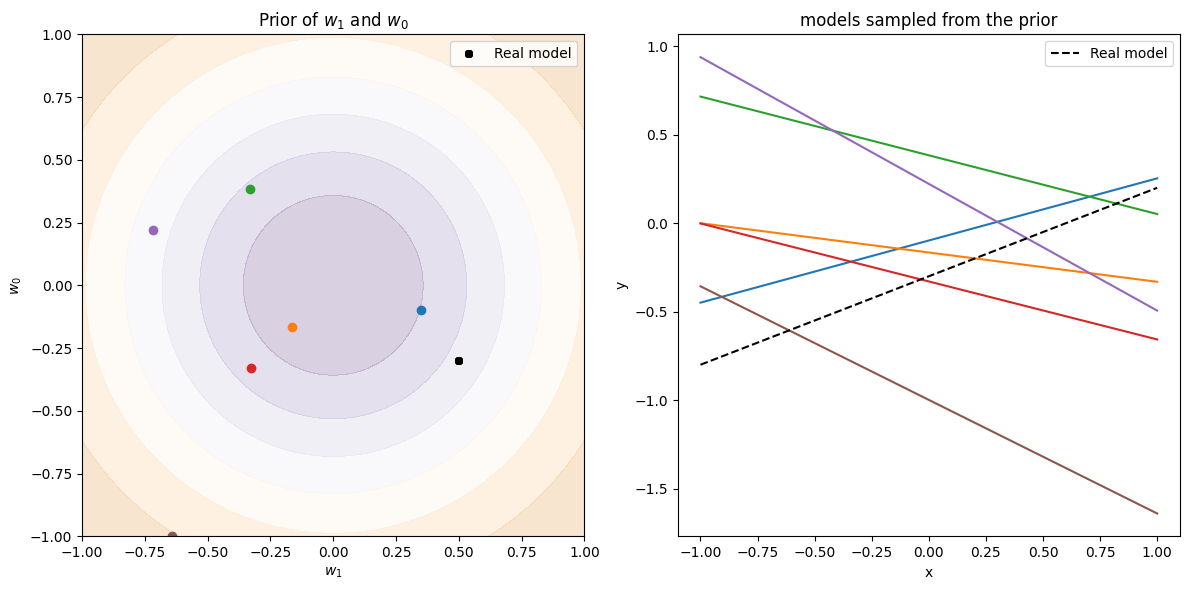

In [ ]:
sigma_n = 0.2  # Noise

# Prior parameters
mp = np.zeros(2)
Sp = 0.5*np.eye(2)

# Plot the prior
fa, aa = plt.subplots(1,2,figsize=(12,6))
ak = aa[0]
draw_Gauss_2d(ak, -1,1,-1,1, mp, Sp)
# Generate possible models (w) from the prior
rv = multivariate_normal(mp, Sp)
zz = rv.rvs(size=20, random_state=42)
# Select w in [-1,1]x[-1,1], just for representative purposes
zz = zz[zz[:,0]>-1]
zz = zz[zz[:,0]<1]
zz = zz[zz[:,1]>-1]
zz = zz[zz[:,1]<1]
zz = zz[:6,:] # We only use 6 possible w and plot these w
for ii, zi in enumerate(zz):
  ak.scatter(zi[0], zi[1], marker='o')
ak.set_xlabel('$w_1$')
ak.set_ylabel('$w_0$')
ak.set_title('Prior of $w_1$ and $w_0$')
_=ak.axis([-1,1,-1,1])
# Add real model [a0, a1]
ak.scatter(x=0.5, y=-0.3, marker='+', linewidths=4, color='black', label='Real model')
ak.legend()
# In other plot, we represent these models
ak = aa[1]
xg = np.linspace(-1,1,3)
for ii, ww in enumerate(zz):
  yg = xg*ww[0] + ww[1]
  ak.plot(xg, yg)

# Add real model
yg = xg*0.5 -0.3
ak.plot(xg, yg,'--', color='black', label='Real model')
ak.legend()
ak.set_xlabel('x')
ak.set_ylabel('y')
ak.set_title('models sampled from the prior')
fa.tight_layout()

we can see the different values obtained with the pior of w1 and w0

In [ ]:
# Save prior parameters into a dictionary
d_mw = {0:mp}
d_Sw = {0:Sp}

#### Posterior distribution
Now we receive our first training observation

In [ ]:
x, y = get_observation()
print("Observation: x={0:.3f}, y={1:.3f}".format(x, y))
X = [x]
Y = [y]

Observation: x=-0.444, y=-0.430


You can compute the likelihood of this data point
$$
p(y|x,\mathbf w,\sigma_n) = \mathcal N(y|xw_1 + w_0, \sigma_n^2)
$$

In [ ]:
def draw_likelihood_2d(ax, xmin=-1, xmax=1, ymin=-1, ymax=1, x=0, y=0,sigma=1):
  npoints=100
  W1g = np.linspace(xmin-.05*np.absolute(xmin),
                   xmax + .05*np.absolute(xmax),
                   npoints) # or whatever values for x

  W0g = np.linspace(ymin-.05*np.absolute(ymin),
                   ymax + .05*np.absolute(ymax),
                   npoints)   # or whatever values for y
  W1, W0 = np.meshgrid(W1g, W0g)
  Xshape = W1.shape

  x_test = W1.reshape(-1,1)*x + W0.reshape(-1,1)
  zz = norm.pdf(x_test, loc=y,scale=sigma)
  zz = zz.reshape(Xshape)
  return ax.contourf(W1, W0, zz, alpha=0.2, cmap='PuOr')

The posterior $p(\mathbf w|x,y)$ can be computed as
$$
p(\mathbf w|x,y) = \frac{p(\mathbf y|X,\mathbf w) p(\mathbf w|X)}{p(\mathbf y|X)}
$$
We know $p(\mathbf w|x,y)$ is a Gaussian with parameters
- mean
$$
\mathbf m_{\mathbf w} = \sigma_n^{-2}\left( \sigma_n^{-2} \left[\begin{array}{c}x\\1\end{array}\right] \left[\begin{array}{cc}x & 1\end{array}\right] + \Sigma_p^{-1}\right)^{-1} \left[\begin{array}{c}x \\1\end{array}\right] y
$$
- covariance
$$
\Sigma_{\mathbf w}  =\left( \sigma_n^{-2} \left[\begin{array}{c}x\\1\end{array}\right] \left[\begin{array}{cc}x & 1\end{array}\right] + \Sigma_p^{-1}\right)^{-1}
$$

In [ ]:
# Function to update the posterior from a new sample and a given prior
def update_posterior(X,Y, Sp, sigma_n):
  N = len(Y)

  X1 = np.hstack((X.reshape(-1,1), np.ones((N,1))))

  XX = X1.T.dot(X1)

  sn2 = sigma_n**(-2)
  iSp = np.linalg.inv(Sp)
  Sw = np.linalg.inv(sn2*XX+iSp)

  mw = sn2*Sw.dot(X1.T).dot(Y.reshape(-1,1))

  return mw.flatten(), Sw

In [ ]:
def pinta_iteracion(X,Y,mw, Sw, Sp, sigma_n):
  x = X[-1]
  y = Y[-1]
  fa, aa = plt.subplots(1,3,figsize=(12,4))
  ak = aa[0]
  draw_likelihood_2d(ak, -1,1,-1,1, x, y, sigma_n)
  ak.scatter(x=0.5, y=-0.3, marker='+', linewidths=4, color='black', label='Real model')
  ak.legend()
  ak.set_xlabel('$w_1$')
  ak.set_ylabel('$w_0$')
  ak.set_title('p(y|x,w) as a function of $w_1$ and $w_0$')
  _=ak.axis([-1,1,-1,1])

  ak = aa[1]

  draw_Gauss_2d(ak, -1,1,-1,1, mw, Sw)
  rv = multivariate_normal(mw, Sw)
  zz = rv.rvs(size=20, random_state=42)
  zz = zz[zz[:,0]>-1]
  zz = zz[zz[:,0]<1]
  zz = zz[zz[:,1]>-1]
  zz = zz[zz[:,1]<1]
  zz = zz[:6,:]
  for ii, zi in enumerate(zz):
    ak.scatter(zi[0], zi[1], marker='o')
  ak.scatter(x=0.5, y=-0.3, marker='+', linewidths=4, color='black', label='Real model')
  ak.legend()
  ak.set_xlabel('$w_1$')
  ak.set_ylabel('$w_0$')
  ak.set_title('Posterior of $w_1$ and $w_0$')
  _=ak.axis([-1,1,-1,1])

  ak = aa[2]
  xg = np.linspace(-1,1,3)
  for ii, ww in enumerate(zz):
    yg = xg*ww[0] + ww[1]
    ak.plot(xg, yg)
  # Real model
  yg = xg*0.5 -0.3
  ak.plot(xg, yg,'--', color='black', label='Real model')

  ak.set_xlabel('x')
  ak.set_ylabel('y')
  ak.scatter(X,Y,marker='o', color='cyan', label='Observations')
  #ak.scatter(x, y, marker='o')
  ak.legend()
  ak.set_title('models sampled from the posterior')
  fa.tight_layout()

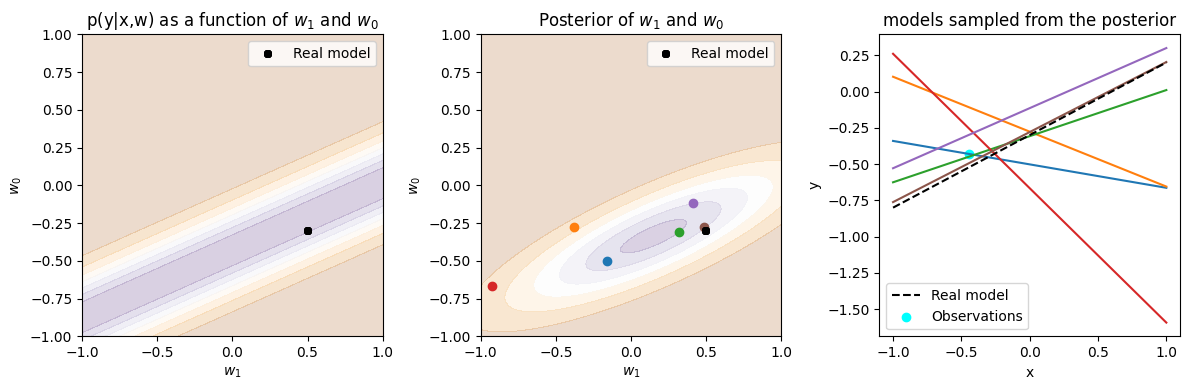

In [ ]:
mw, Sw = update_posterior(np.array(X), np.array(Y), Sp, sigma_n)
pinta_iteracion(X,Y,mw, Sw, Sp, sigma_n)
kk = len(d_mw)
# save posterior as prior for the next iteration
d_mw[kk] = mw
d_Sw[kk] = Sw

now the posterior, the mean has been moved, but now is closer to the real model. The variance is lower.
All the lines are near to the single point because is the only information we have

Now we receive another training observation



Compute the likelihood for the new data point, and use the posterior in the previous step as prior pdf for $\mathbf w$.

Observation: x=0.271, y=-0.291


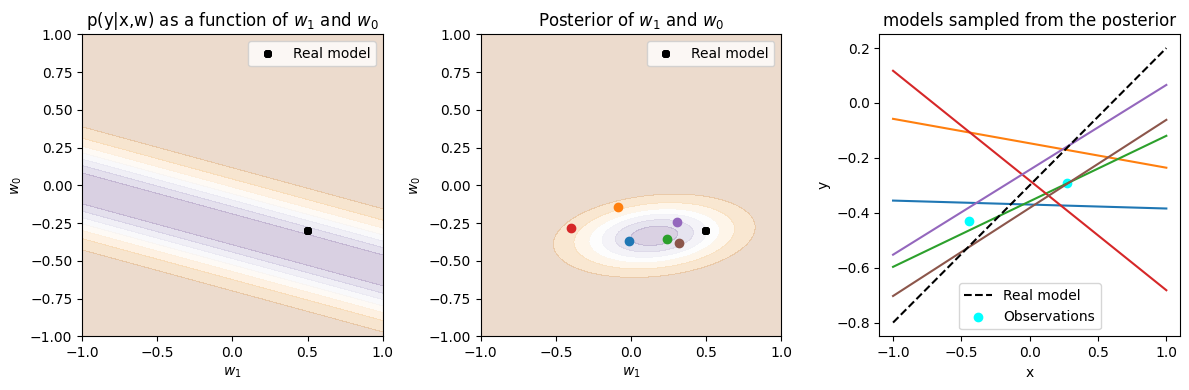

In [ ]:
x, y = get_observation()
print("Observation: x={0:.3f}, y={1:.3f}".format(x, y))
X.append(x)
Y.append(y)
mw, Sw = update_posterior(np.array(X), np.array(Y), Sp, sigma_n)
pinta_iteracion(X,Y,mw, Sw, Sp, sigma_n)
kk = len(d_mw)
# save posterior as prior for the next iteration
d_mw[kk] = mw
d_Sw[kk] = Sw

the posterior, the mean has been modes and the covarinace even lower. Now we have two point, the solution tends to be closer to those points

Observation: x=-0.581, y=-0.446


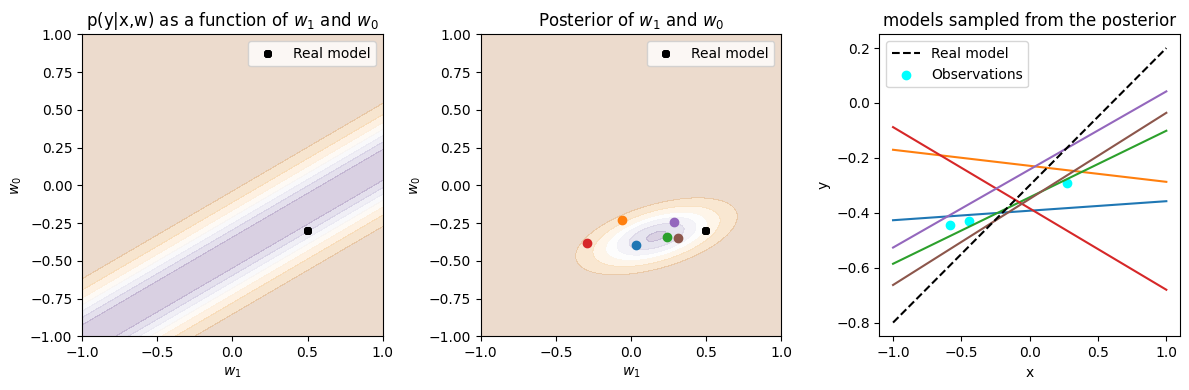

In [ ]:
x, y = get_observation()
print("Observation: x={0:.3f}, y={1:.3f}".format(x, y))
X.append(x)
Y.append(y)
mw, Sw = update_posterior(np.array(X), np.array(Y), Sp, sigma_n)
pinta_iteracion(X,Y,mw, Sw, Sp, sigma_n)
kk = len(d_mw)
d_mw[kk] = mw
d_Sw[kk] = Sw

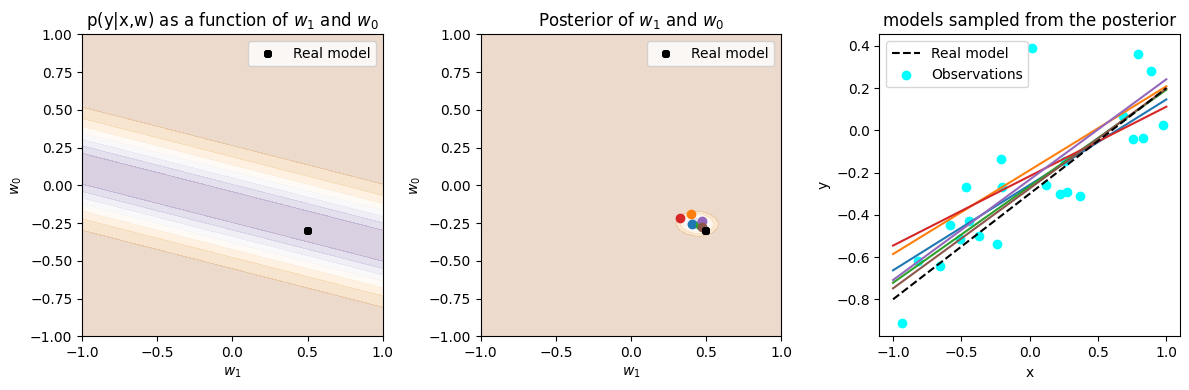

In [ ]:
for iteration in range(20):
  x, y = get_observation()
  X.append(x)
  Y.append(y)
  mw, Sw = update_posterior(np.array(X), np.array(Y), Sp, sigma_n)
  kk = len(d_mw)
  d_mw[kk] = mw
  d_Sw[kk] = Sw
pinta_iteracion(X,Y,mw, Sw, Sp, sigma_n)

the mean is closer to the real value and the covariance is lower (we have more information) in the posteiror. The solution are in similar direction to the real model.

### Predictive distribution

The biggest difference of the Bayesian linear model with respect to usual linear regression (maximum likelihood) model is that instead of a single set of parameters we have a probability distribution on $\mathbf w$.

This posterior pdf can be exploited for doing **inference** in test observations.

You receive a new **test observation** $\mathbf x_t$ and exploit the model to guess the distribution of its corresponding target

$$
f_t(\mathbf x_t) =  \mathbf w^{\top} \mathbf x_t
$$

where
$$
f_t \sim \mathcal N(\mathbf m_{\mathbf w}^\top\mathbf x_t, \mathbf x_t^\top \Sigma_{\mathbf w} \mathbf x_t)
$$

Notice that $f_t$ is **random** because $\mathbf w$ is still a random variable. You have just learned its **posterior** distribution.

In real applications, we can use to make our predictions. But, additionaly, the variance of this distibution is providing information about our uncertainty. If we analize in the detail the expresion of the variance:
$$\mathbf x_t^\top \Sigma_{\mathbf w} \mathbf x_t = \mathbf x_t^\top \left( \sigma_n^{-2} X^{\top}X + \Sigma_p^{-1}\right)^{-1}  \mathbf x_t$$

When we want to analyze the output of the model for the training data, one works with the predicitive distribution of $y_t$ instead of the $f_t $ one (that is better because we know the variance which will give us if the model is more confident or not (low standard desviation)). Due to $ y_t = f_t+ \epsilon$, we have that

$$
y_t \sim \mathcal N(\mathbf m_{\mathbf w}^\top\mathbf x_t, \mathbf x_t^\top \Sigma_{\mathbf w} \mathbf x_t + \sigma_n^2)
$$

$f_t$ is known as the noiseless output of the model, while $y_t$ is the noisy output. When we want to compare the model output on our training samples that have noise, we use the distribution of $y_t$, while to make predictions we use the noiseless output. Note that both have the same mean and the only difference is their variance, since $y_t$ includes the variance of the noise.

In both cases, we can observe:
- Each test sample has a different variance. In fact, the magnitude of our observations influence over the predictive variance of the model.
- The variance is a quadratic form of the test sample and the posterior covariance. This will make that test samples close to many training points will have a low predictive uncertainty, whereas test samples in regions where there were few (or none) training samples will have a large predictive variance.

Hay que tener en cuenta que la media y la varianza dependen de x (test) por tanto depende del tipo de test data you enter. Large variance if the training data is not very correlated to the test data.

Let's analyze this with the previous example, including the predictive distribution:




In [ ]:
def plot_iteracion_predictive(mw, Sw, sigma_n,X=None,Y=None):
  if X is not None:
    x = X[-1]
    y = Y[-1]
  fa, aa = plt.subplots(1,4,figsize=(16,4))
  ak = aa[0]

  draw_Gauss_2d(ak, -1,1,-1,1, mw, Sw)
  rv = multivariate_normal(mw, Sw)
  zz = rv.rvs(size=20, random_state=42)
  zz = zz[zz[:,0]>-1]
  zz = zz[zz[:,0]<1]
  zz = zz[zz[:,1]>-1]
  zz = zz[zz[:,1]<1]
  zz = zz[:6,:]
  for ii, zi in enumerate(zz):
    ak.scatter(zi[0], zi[1], marker='o')

  ak.scatter(x=0.5, y=-0.3, marker='+', linewidths=4, color='black', label='Real model')
  ak.legend()
  ak.set_xlabel('$w_1$')
  ak.set_ylabel('$w_0$')
  ak.set_title('Posterior of $w_1$ and $w_0$')
  _=ak.axis([-1,1,-1,1])

  ak = aa[1]
  ng=5
  xg = np.linspace(-1,1,ng)
  for ii, ww in enumerate(zz):
    yg = xg*ww[0] + ww[1]
    ak.plot(xg, yg)

  # Real model
  yg = xg*0.5 -0.3
  ak.plot(xg, yg,'--', color='black', label='Real model')
  ak.set_xlabel('x')
  ak.set_ylabel('y')
  ak.legend()
  if X is not None:
    ak.scatter(X,Y,marker='o', color='cyan', label='Observations')

  ak.legend()

  ak.set_title('models sampled from the posterior')
  _=ak.axis([-1,1,-1,1])

  ak = aa[2]
  my = xg*mw[0] + mw[1]
  varf = (xg**2*Sw[0,0] + xg*Sw[0,1] + xg*Sw[1,0] + Sw[1,1])
  sf = np.sqrt(varf)

  ak.plot(xg,my,label='mean')
  ak.plot(xg,my+1.96*sf,label='2std',linestyle='--',color='pink')
  ak.fill_between(xg, my-2*sf, my+2*sf,alpha=0.1,color='pink')
  ak.plot(xg,my-1.96*sf,linestyle='--',color='pink')

  ak.plot(xg,my+sf,label='1std',linestyle='--',color='red')
  ak.fill_between(xg, my-sf, my+sf,alpha=0.3,color='pink')
  ak.plot(xg,my-sf,linestyle='--',color='red')

  ak.set_xlabel('$x_t$')
  ak.set_ylabel('$y_t$')

  ak.legend()
  ak.set_title('Predictive Distribution of f')
  _=ak.axis([-1,1,-1,1])

  ak = aa[3]
  sy = np.sqrt(varf + sigma_n**2)

  plt.plot(xg,my,label='mean')
  plt.plot(xg,my+1.96*sy,label='2std',linestyle='--',color='pink')
  plt.fill_between(xg, my-2*sy, my+2*sy,alpha=0.1,color='pink')
  plt.plot(xg,my-1.96*sy,linestyle='--',color='pink')

  plt.plot(xg,my+sy,label='1std',linestyle='--',color='red')
  plt.fill_between(xg, my-sy, my+sy,alpha=0.3,color='pink')
  plt.plot(xg,my-sy,linestyle='--',color='red')

  ak.set_xlabel('$x_t$')
  ak.set_ylabel('$f_t$')
  ak.set_title('Predictive Distribution of y')
  _=ak.axis([-1,1,-1,1])

  ak.legend()

  fa.tight_layout()

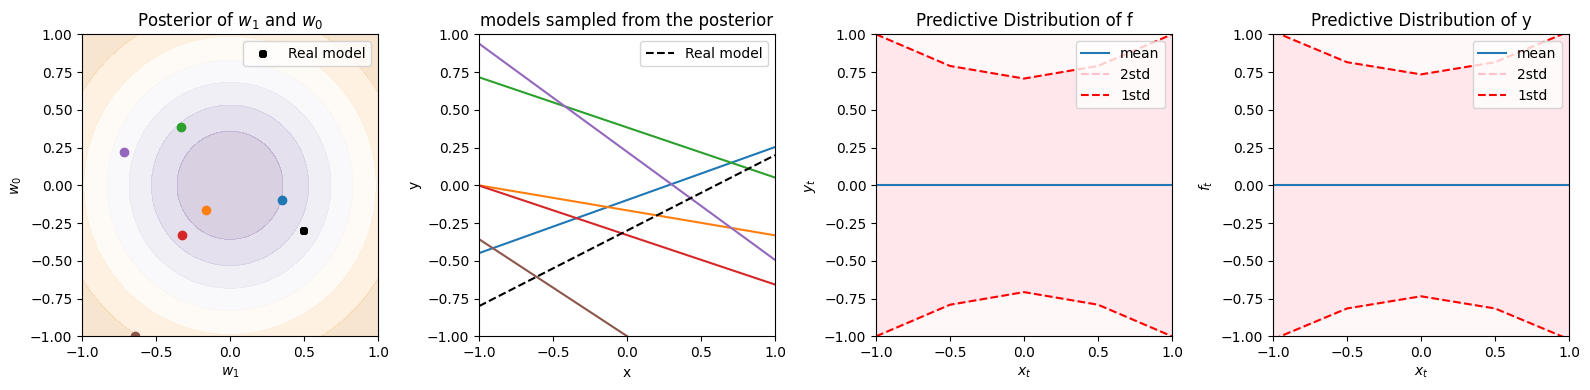

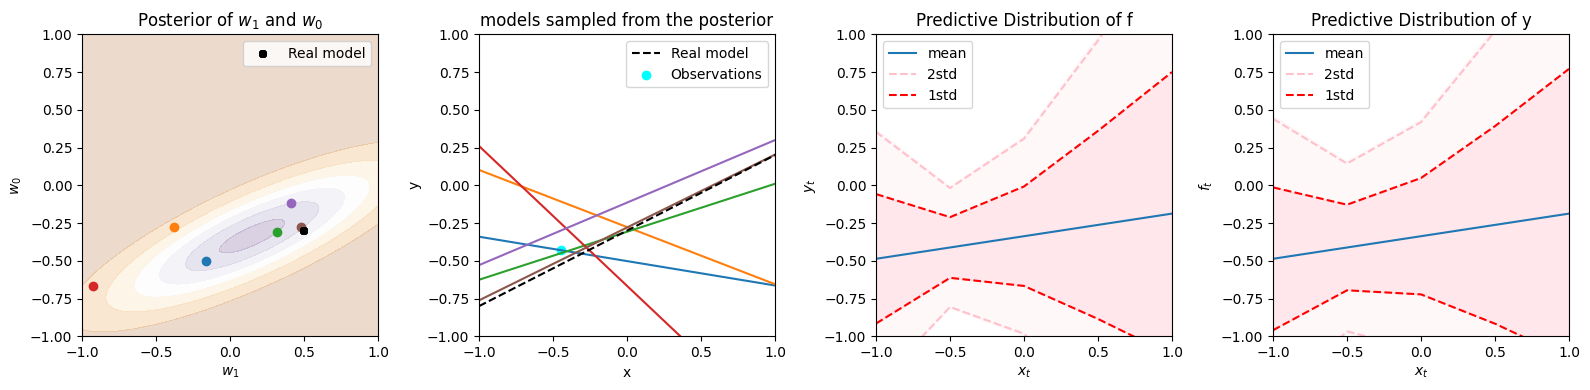

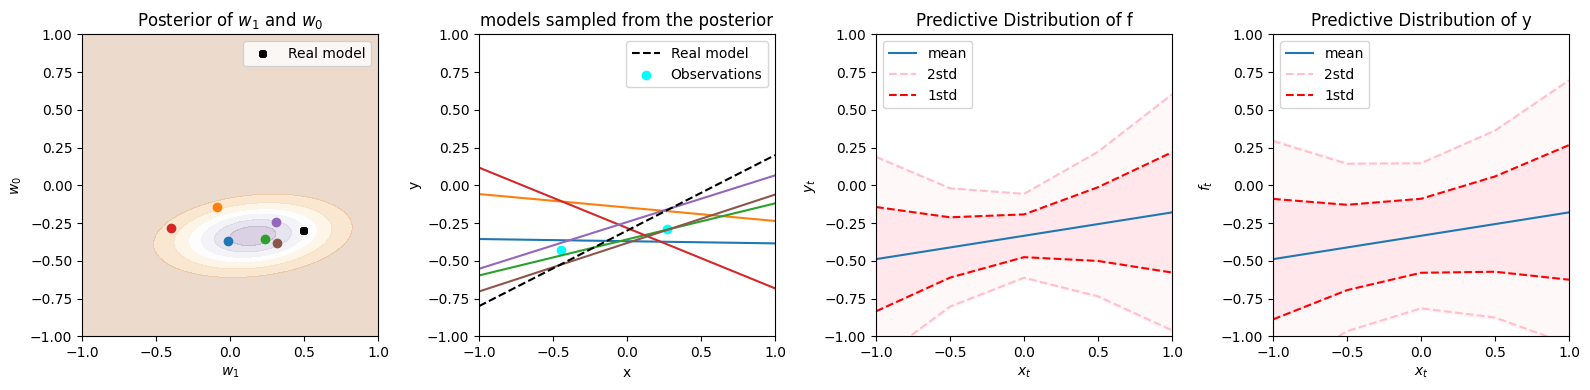

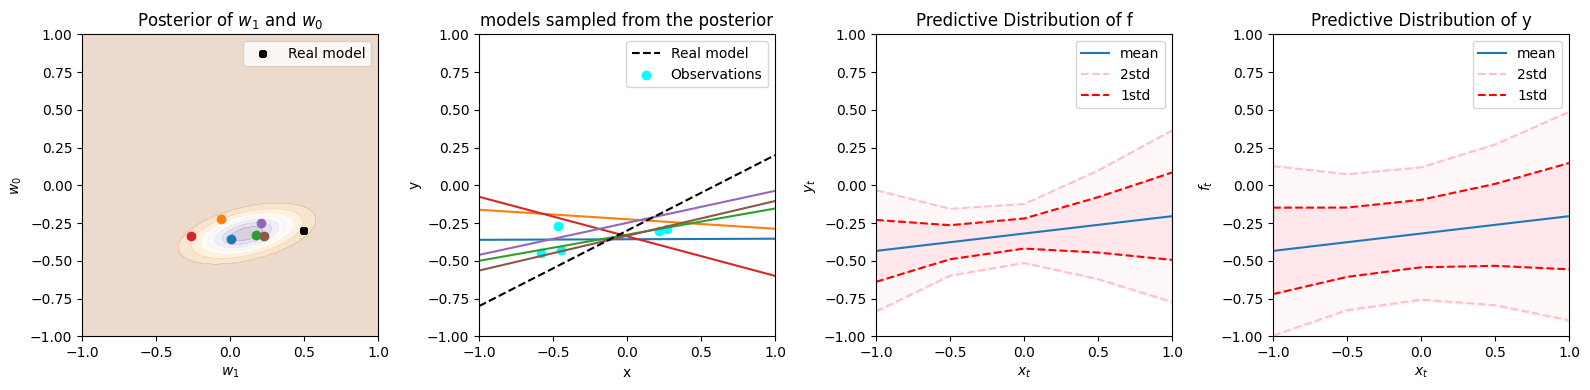

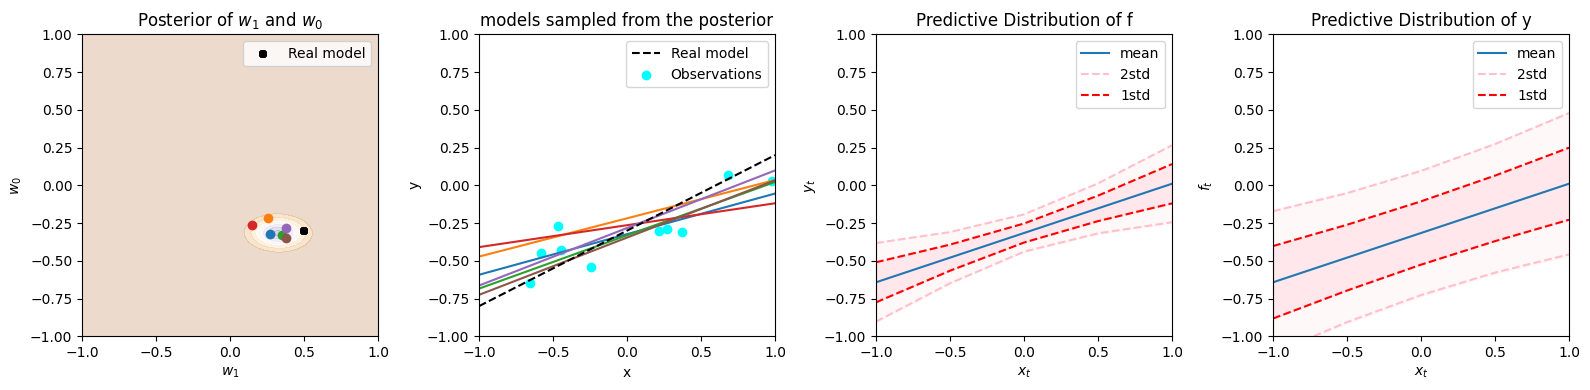

In [ ]:
plot_iteracion_predictive(mp, Sp, sigma_n)
for kk in [1,2,5,10]:
  plot_iteracion_predictive(d_mw[kk], d_Sw[kk], sigma_n,X[:kk], Y[:kk])

in 2 std we have the 95% of the data

So far, we have assumed we knew the real value of $\sigma_n$. What if you didn't have the correct $\sigma_n$. Assume you think $\sigma_n=2$

Let's start by reconsidering the ideal case but with more observations...

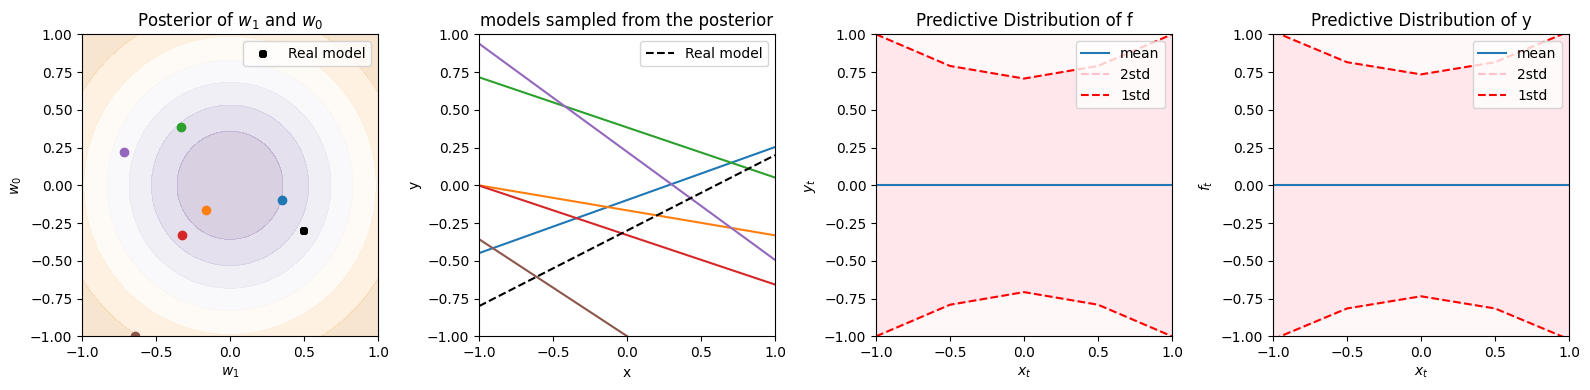

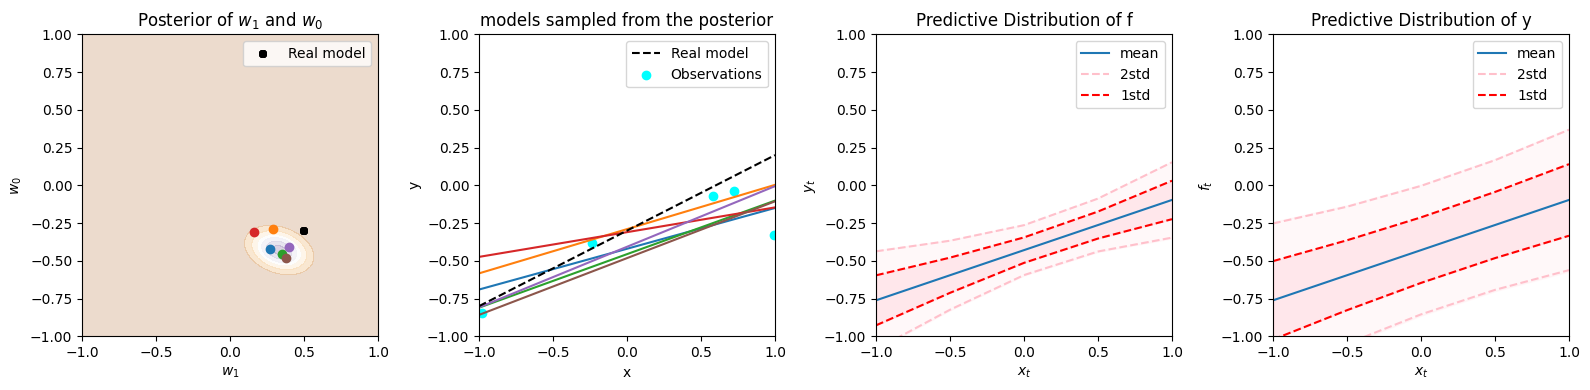

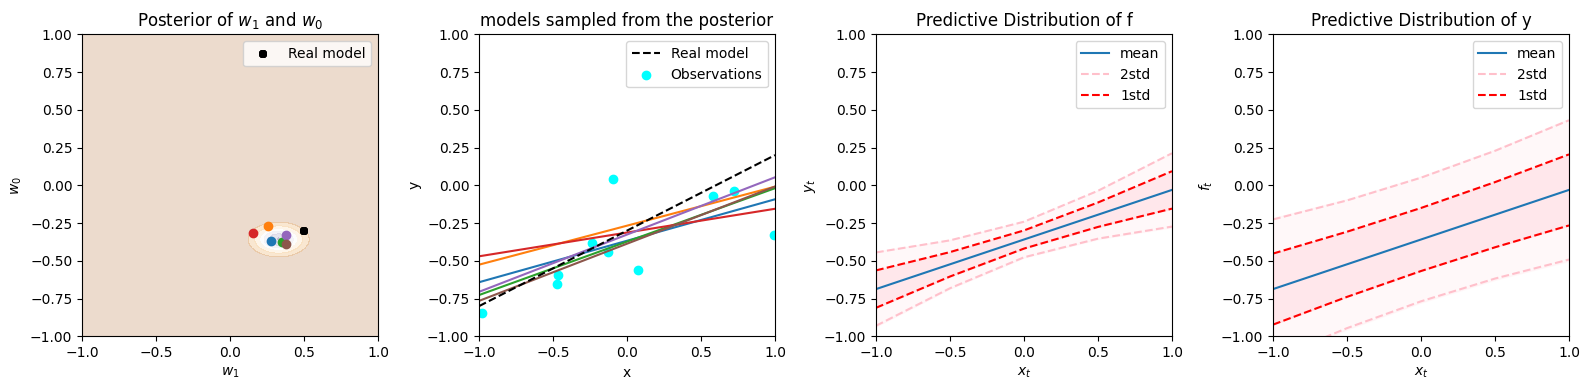

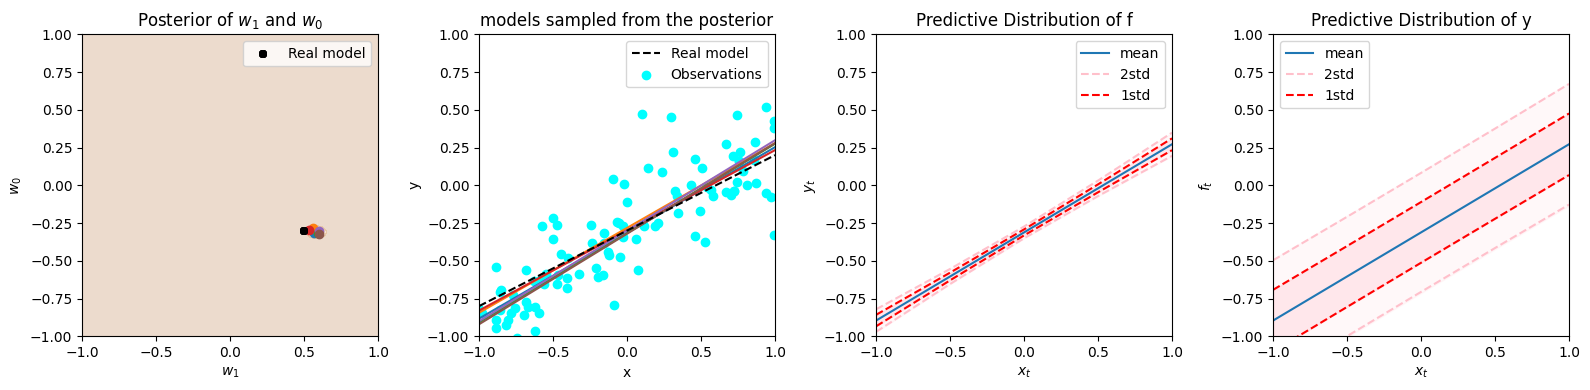

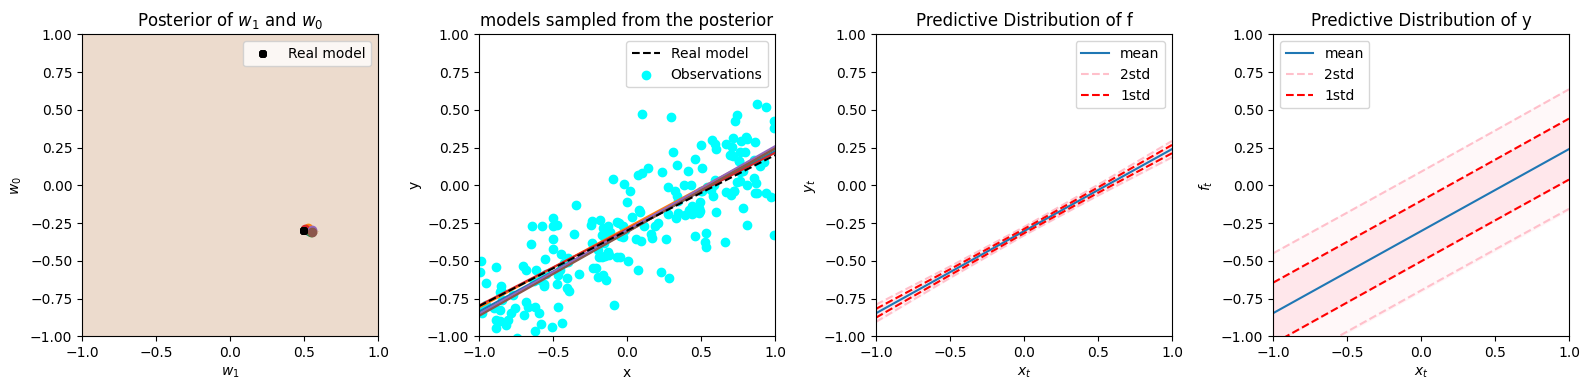

In [ ]:
sigma_n = 0.2
mp = np.zeros(2)
Sp = 0.5*np.eye(2)
X=[]
Y=[]
d_mw={}
d_Sw = {}

for iteration in range(220):
  x, y = get_observation()
  X.append(x)
  Y.append(y)
  mw, Sw = update_posterior(np.array(X), np.array(Y), Sp, sigma_n)
  kk = len(d_mw)
  d_mw[kk] = mw
  d_Sw[kk] = Sw
plot_iteracion_predictive(mp, Sp, sigma_n)
for kk in [5,10,100, 200]:
  plot_iteracion_predictive(d_mw[kk], d_Sw[kk], sigma_n,X[:kk], Y[:kk])

##### **Exercise 1**

Repeat the previous example assuming that $\sigma_n=2$ and analyze the result

in this case where the noise is very high

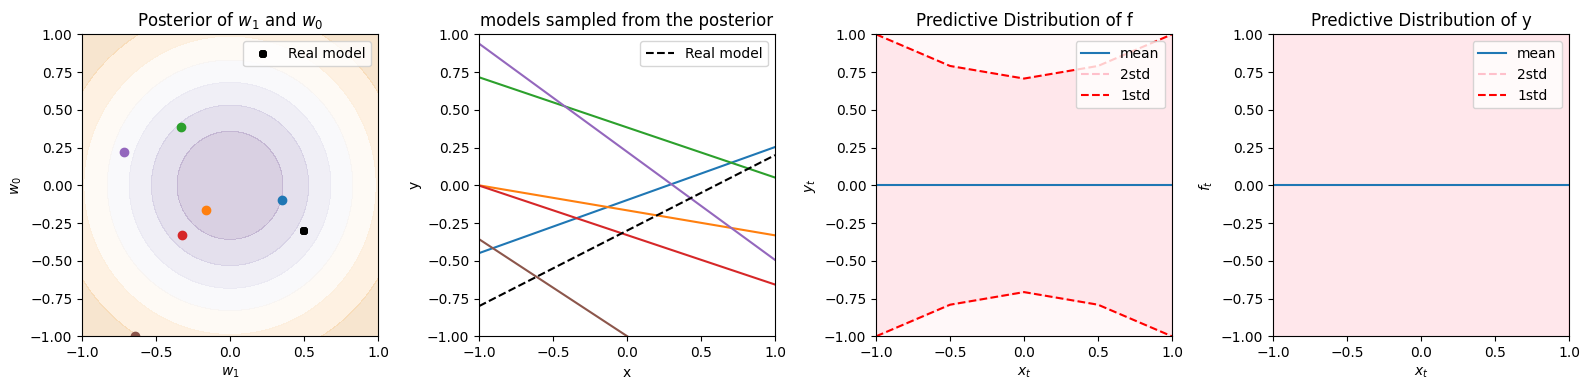

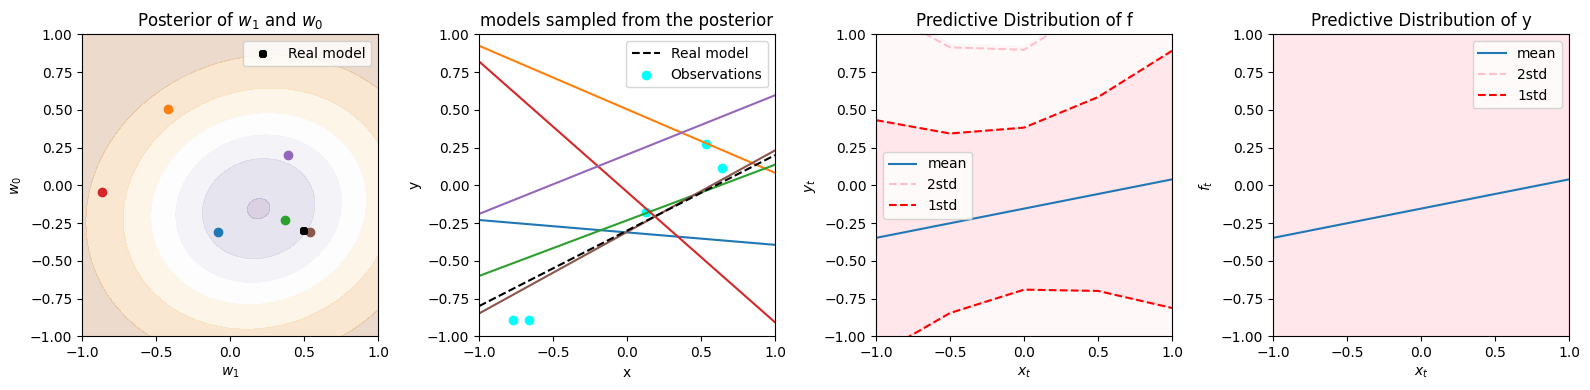

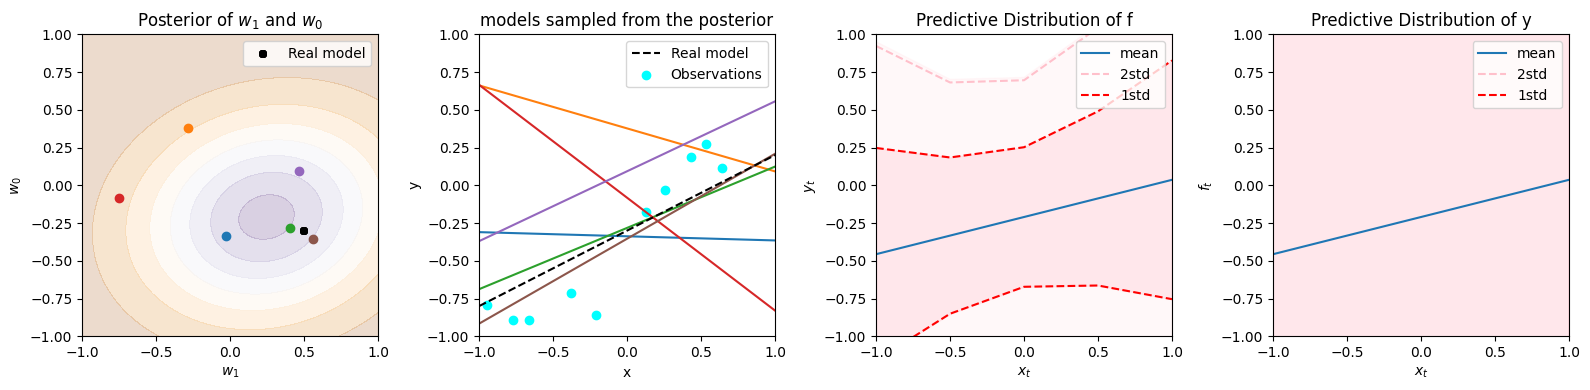

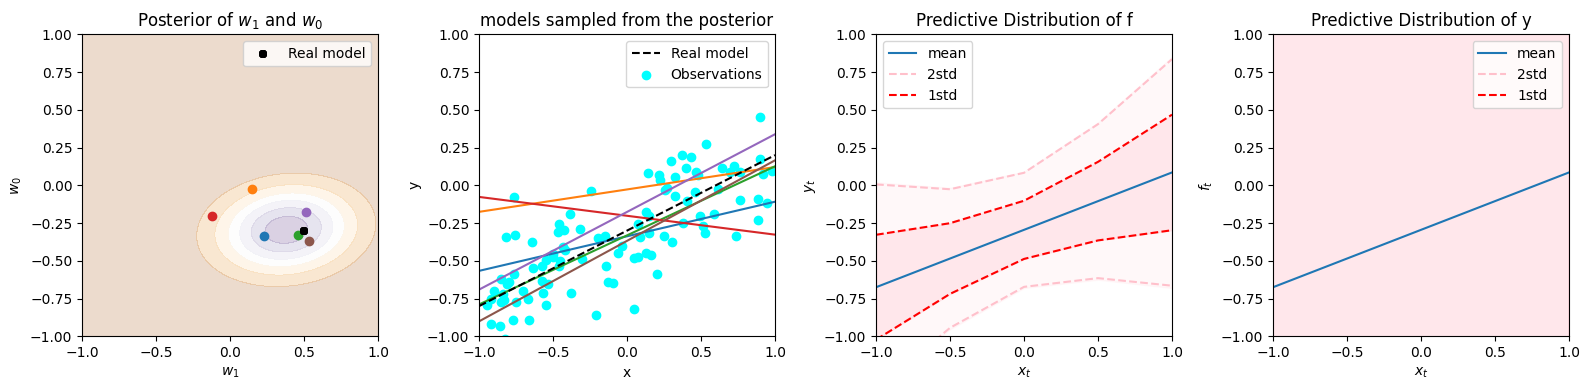

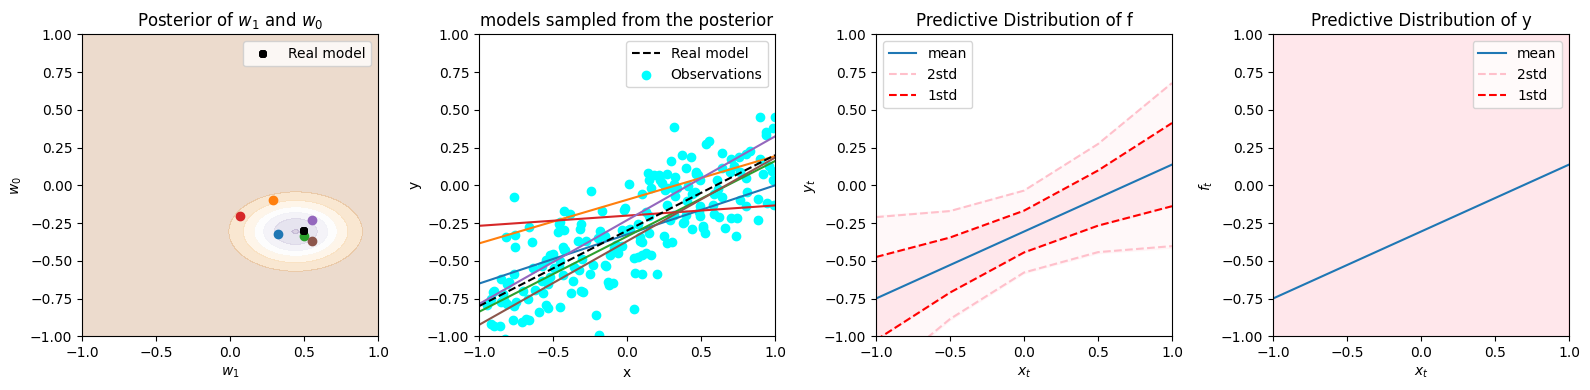

In [ ]:
#<SOL>
sigma_n = 2
mp = np.zeros(2)
Sp = 0.5*np.eye(2)
X=[]
Y=[]
d_mw={}
d_Sw = {}

for iteration in range(220):
  x, y = get_observation()
  X.append(x)
  Y.append(y)
  mw, Sw = update_posterior(np.array(X), np.array(Y), Sp, sigma_n)
  kk = len(d_mw)
  d_mw[kk] = mw
  d_Sw[kk] = Sw
plot_iteracion_predictive(mp, Sp, sigma_n)
for kk in [5,10,100, 200]:
  plot_iteracion_predictive(d_mw[kk], d_Sw[kk], sigma_n,X[:kk], Y[:kk])
#</SOL>

the posterior does not trut the prior becuase of lot of noise, Now we trust in prior

##### **Exercise 2**

And $\sigma_n=0.02$??

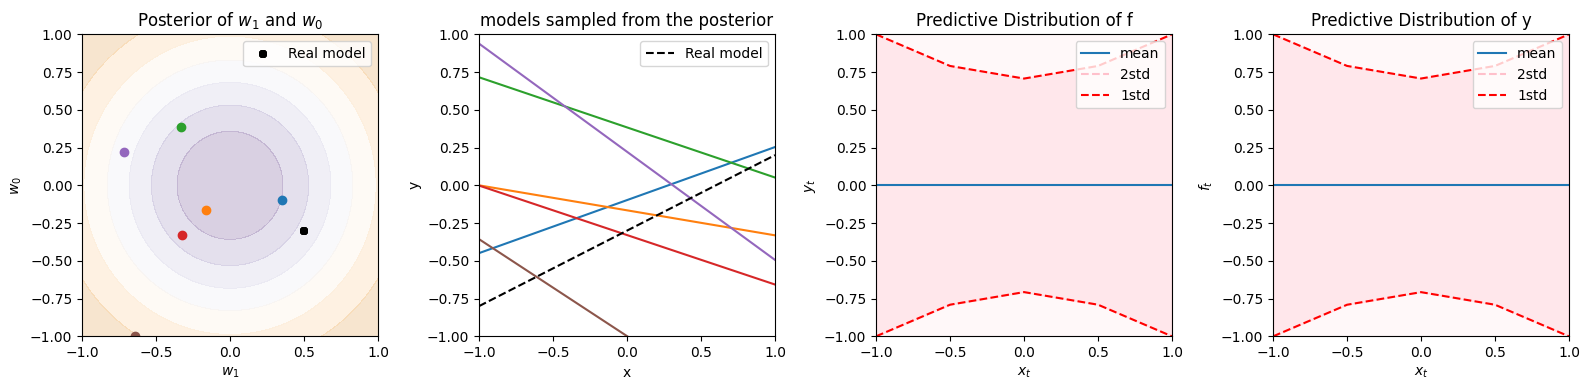

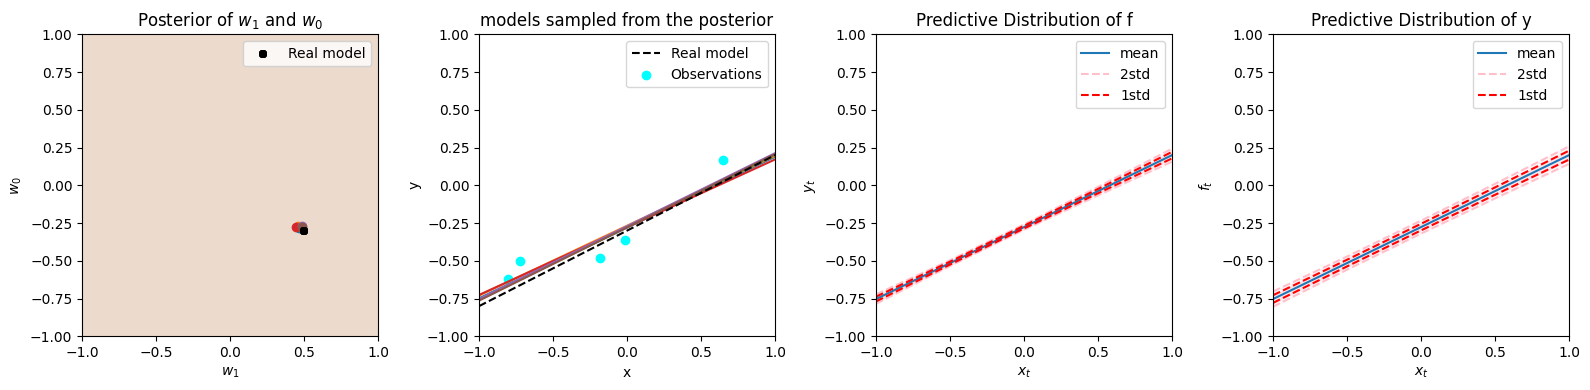

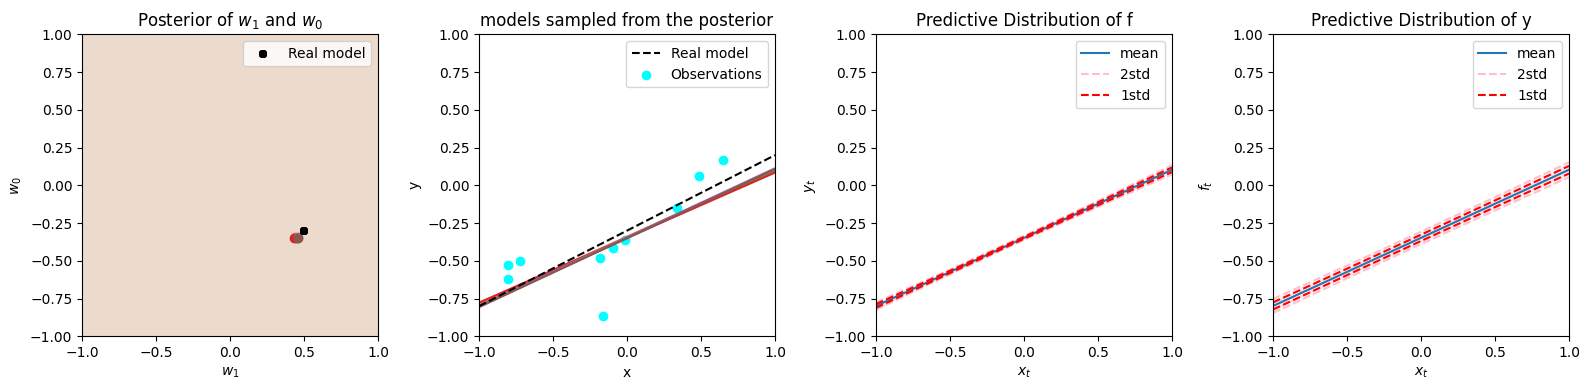

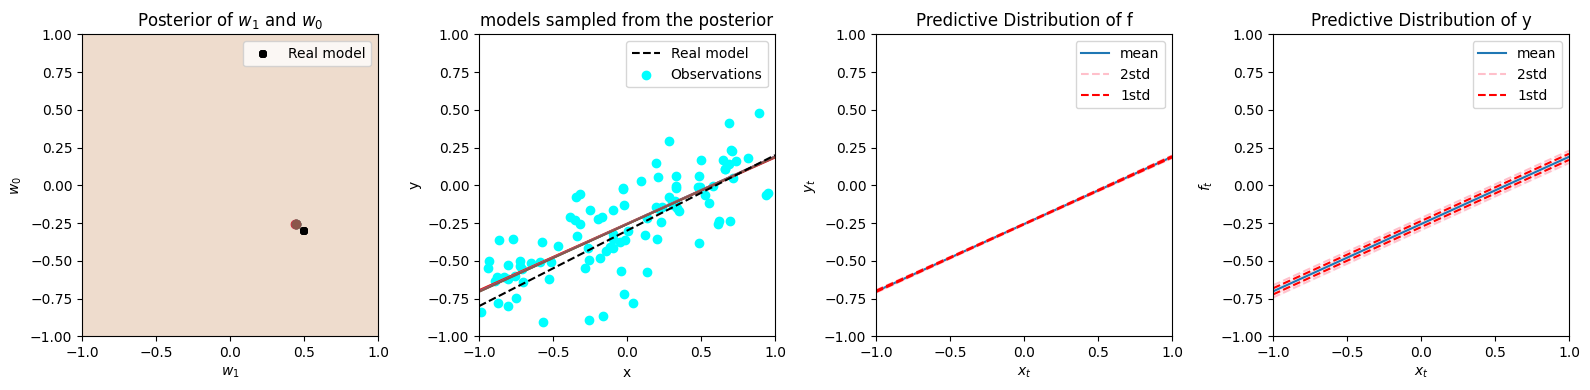

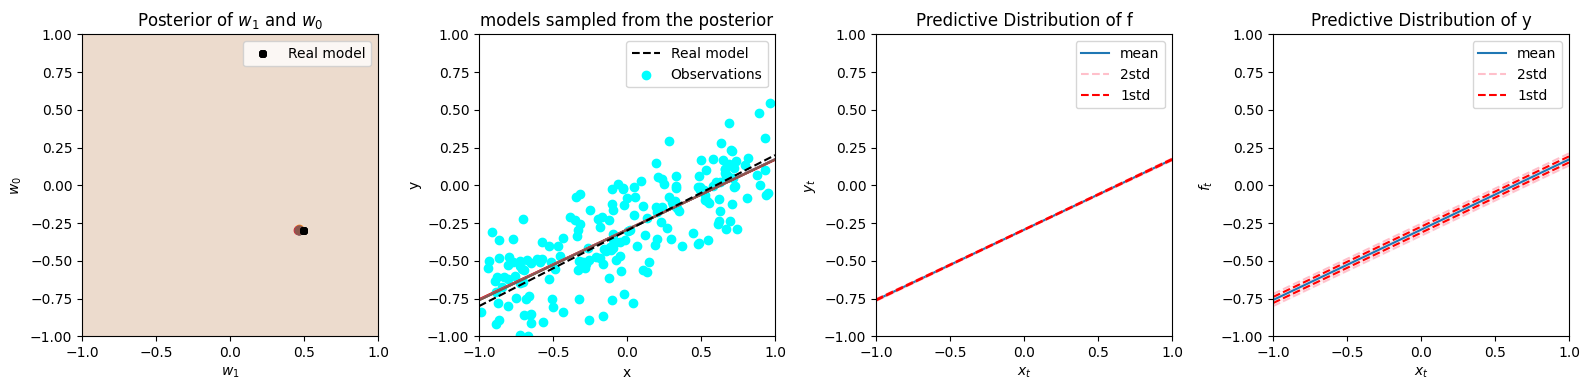

In [ ]:
#<SOL>
sigma_n = 0.02
mp = np.zeros(2)
Sp = 0.5*np.eye(2)
X=[]
Y=[]
d_mw={}
d_Sw = {}

for iteration in range(220):
  x, y = get_observation()
  X.append(x)
  Y.append(y)
  mw, Sw = update_posterior(np.array(X), np.array(Y), Sp, sigma_n)
  kk = len(d_mw)
  d_mw[kk] = mw
  d_Sw[kk] = Sw
plot_iteracion_predictive(mp, Sp, sigma_n)
for kk in [5,10,100, 200]:
  plot_iteracion_predictive(d_mw[kk], d_Sw[kk], sigma_n,X[:kk], Y[:kk])

#</SOL>

the likelihood is one that only has to weight. We trust on the data, on the likelihood.

You cancannot rely on your estimation, all the training data is outside the estimation

# 3. No linear bayesian regression


## 3.1 Projections of Inputs into Feature Space

The Bayesian linear model that we have just presented can be  **easily** extended to nonlinear models using the **kernel trick**.

Consider a mapping ${\bf \phi}(\mathbf{x})$ onto a feature space of dimension $D'>D$. Now the data matrix is $\Phi$ of size $N\times D'$ and the model
$$
y(\mathbf x) = \mathbf w^{\top} {\bf \phi}(\mathbf{x}) + \epsilon
$$
$$
f(\mathbf x) = \mathbf w^{\top} {\bf \phi}(\mathbf{x})
$$

The **posterior of $\mathbf w$ in feature space** will be of course a Gaussian
$$
p(\mathbf w|\Phi,\mathbf y) = \mathcal N\left( \sigma_n^{-2}(\sigma_n^{-2}\Phi^\top \Phi + \Sigma_p^{-1})^{-1}\Phi^\top\mathbf y, (\sigma_n^{-2}\Phi^\top \Phi + \Sigma_p^{-1})^{-1}\right)
$$

After some algebra
$$
\mathbf m_{\mathbf w} = \Sigma_p \Phi^\top (\Phi\Sigma_p \Phi^\top + \sigma_n^2\mathbf I)^{-1}\mathbf y
$$
$$
\Sigma_{\mathbf w} = \Sigma_p - \Sigma_p \Phi^\top(\Phi\Sigma_p \Phi^\top + \sigma_n^2\mathbf I)^{-1} \Phi \Sigma_p
$$

At this point, there is no way to apply the kernel trick, in fact $
\mathbf m_{\mathbf w}$ is a vector of dimension $D'$ (which can be infinite) and $ \Sigma_{\mathbf w}$ a matrix of $D'\times D'$. So how can we handle this?

The solution arrives using **the predictive funcion in the feature space**. If we compute the predictive mean and variance, we have:
- mean:
$$
\mathbf \phi(\mathbf x_t)^{\top}\mathbf m_{\mathbf w} = \mathbf \phi(\mathbf x_t)^{\top} \Sigma_p \Phi^\top (\Phi \Sigma_p \Phi^\top + \sigma_n^2\mathbf I)^{-1}\mathbf y
$$
- variance
$$
\mathbf \phi(\mathbf x_t)^{\top} \Sigma_{\mathbf w} \mathbf \phi(\mathbf x_t)=\mathbf \phi(\mathbf x_t)^{\top} \left( \Sigma_p - \Sigma_p \Phi^\top(\Phi \Sigma_p \Phi^\top + \sigma_n^2\mathbf I)^{-1}\Phi \Sigma_p \right) \mathbf \phi(\mathbf x_t)
$$

And now, we can define a **kernel** $\kappa(\mathbf x_i, \mathbf x_j) = \mathbf \phi(\mathbf x_t)^{\top} \Sigma_p \mathbf \phi(\mathbf x_t)$ and apply it to the definition of the predictive distribution

- mean:
$$
\mathbf k_t^{\top} (K + \sigma_n^2\mathbf I)^{-1}\mathbf y
$$
- variance
$$
k_{tt} - \mathbf k_t(K + \sigma_n^2\mathbf I)^{-1}\mathbf k_t^{\top}
$$
where $\mathbf k_t$ is a vector with the kernel between $\mathbf x_t$ and all the training observations, $K = \Phi^\top \Sigma_p \Phi$ and $k_{tt} = \kappa(\mathbf x_t, \mathbf x_t)$. So, we have that

$$
f_t \sim \mathcal N(\mathbf k_t^{\top} (K + \sigma_n^2\mathbf I)^{-1}\mathbf y, k_{tt} - \mathbf k_t(K + \sigma_n^2\mathbf I)^{-1}\mathbf k_t^{\top})
$$

So in the nonlinear formulation of the Bayesian regression model, we may not be able to explicitly calculate the mean and variance of the posterior of $\bf w$, but it does not matter since we can calculate the parameters of the predictive distribution that we really need to work with the model.


K (training with trainig), Ktt(test, test), kt(test and training)

### Example with non-linear regression

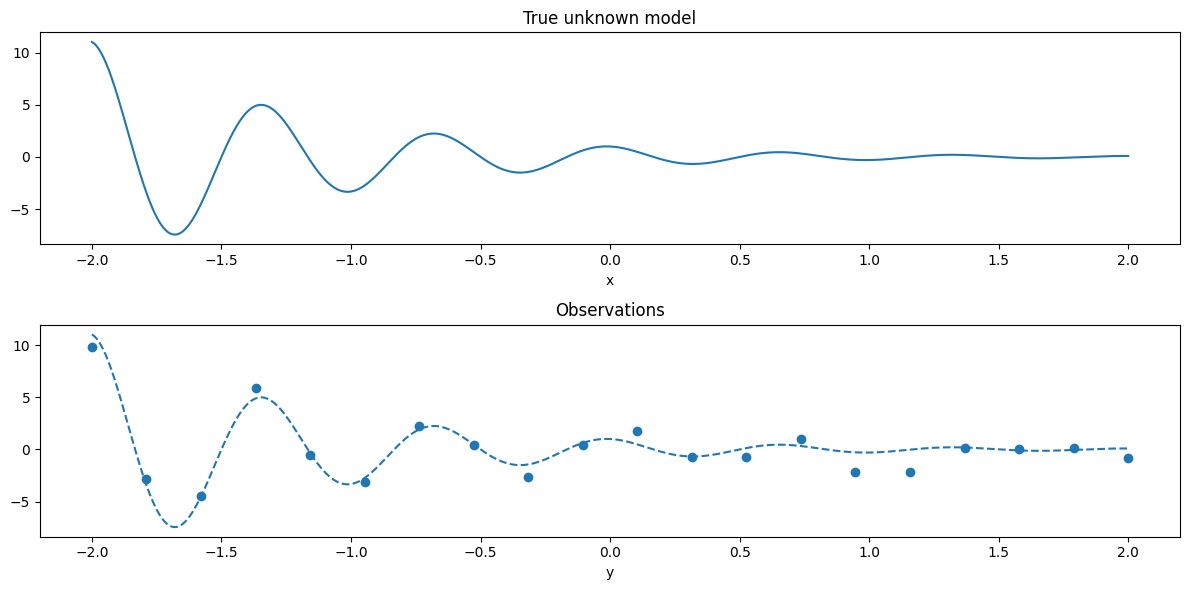

In [ ]:
# Uknown  generative model
def ff(x, a=1.2, b=3):
  return np.exp(-a*x)*np.cos(b*np.pi*x)

a = 1.2

# Example samples
n=20
x = np.linspace(-2,2,n)
# Data for plotting purposes
xg = np.linspace(-2,2,2000)

# Compute model outputs
y = ff(x)
yg = ff(xg)
s = 1 # Noise variance
y += np.array([random.gauss(mu=0, sigma=s) for ii in range(n)]) # Add noise over example samples
#my = np.mean(y)

fa, aa = plt.subplots(2,1,figsize=(12,6))
aa[0].plot(xg,yg,label='ff(x)')
aa[0].set_xlabel('x')
aa[0].set_title('True unknown model')
aa[1].scatter(x,y)
aa[1].plot(xg,yg,linestyle='--',label='underlying ff(x)')
aa[1].set_xlabel('x')
aa[1].set_xlabel('y')
aa[1].set_title('Observations')

fa.tight_layout()

In [ ]:
import random
random.seed(42)
def get_ff_observation(ff):
  sigma_n = 1
  # Change the data generation to analize the predictive variance with uniform samples in the interval [-2,2] vs. no unifrom
  #x = random.uniform(-2,2)
  x = random.gauss(mu=0, sigma=0.5) # more samples around 0
  ee = random.gauss(mu=0, sigma=sigma_n)
  return x, ff(x) + ee

In [ ]:
X=[]
Y=[]
for n in range(100):
  x,y = get_ff_observation(ff)
  X.append(x)
  Y.append(y)

X = np.array(X)[:, None]
Y = np.array(Y)

#### **Exercise 3**
In this exercise, we are going to implement our no linear Bayesian regression model. For this, assuming we know the kernel parameters and the noise variance, we only have to implement a function that calculates the mean and standard deviation of the predicted distribution for each test data.

The next cell gives the skeleton of a function to calculate this distribution. Complete the missing code lines and, later, check it over the provided examples.


##### SOLUTION

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

def get_kernel_predictive_distribution(xt, X, Y, gamma=1.0, sigma_n=1., noisy = True):
  '''x_t: numpy array with test data
     X  : numpy array with input traning data
     Y  : numpy array with output traning data
     gamma  : parameter of RBF kernel
     sigma_n: standard deviation of noise
     noisy  : boolean set to True if we want to include the noise variance in the predictive distribuion


     Returns:
      - my: numpy array of len number of data in x_t with the mean of the predictive distribution for each x_t
      - sy: numpy array of len number of data in x_t with the standar deviation of the predictive distribution for each x_t
  '''

  #<SOL>
  # Prediction with noise or without noise

  K   = rbf_kernel(X,X,gamma=gamma)
  kt  = rbf_kernel(X,xt,gamma=gamma)
  ktt = rbf_kernel(xt,xt,gamma=gamma)

  if noisy == False:
    my  = kt.T @ np.linalg.inv(K) @ Y
    sy  = ktt - ( kt.T @ np.linalg.inv(K) @ kt )
  elif noisy == True:
    my  = kt.T @ np.linalg.inv(K + sigma_n**2*np.identity(K.shape[1])) @ Y
    sy  = ktt - ( kt.T @ np.linalg.inv(K + sigma_n**2*np.identity(K.shape[1])) @ kt )

  #</SOL>
  return my, sy

In [ ]:
# Check for a single test data
xt = np.array([0.])[:,None]
my= get_kernel_predictive_distribution(xt, X, Y, gamma=10.,sigma_n=1.)

In [ ]:
# Check for several test data
xt = np.array([1., 2.])[:, None]
my, sy = get_kernel_predictive_distribution(xt, X, Y, gamma=10.,sigma_n=1.)

Now, use this function on the following code cells to represent the obtained solution.

In [ ]:
def plot_kernel_predictive_distribution(X, Y, gamma=1.0,sigma_n=1.):

  # Test data
  Ng=2000
  xt = np.linspace(-2,2,Ng)
  xt = xt[:, None]
  my, sy = get_kernel_predictive_distribution(xt, X, Y, gamma=gamma,sigma_n=sigma_n)

  fa, ak = plt.subplots(1,1,figsize=(16,4))
  ak.plot(xt,my,label='mean')

  plt.plot(xt,my+1.96*sy,label='2std',linestyle='--',color='pink')
  plt.fill_between(xt, my-2*sy, my+2*sy,alpha=0.1,color='pink')
  plt.plot(xt,my-1.96*sy,linestyle='--',color='pink')

  plt.plot(xt,my+sy,label='1std',linestyle='--',color='red')
  plt.fill_between(xt, my-sy, my+sy,alpha=0.3,color='pink')
  plt.plot(xt,my-sy,linestyle='--',color='red')


  ak.scatter(X,Y,marker='x',label='observations')
  ak.set_title('Predictive Distribution')
  ak.legend()
  fa.tight_layout()

ValueError: ignored

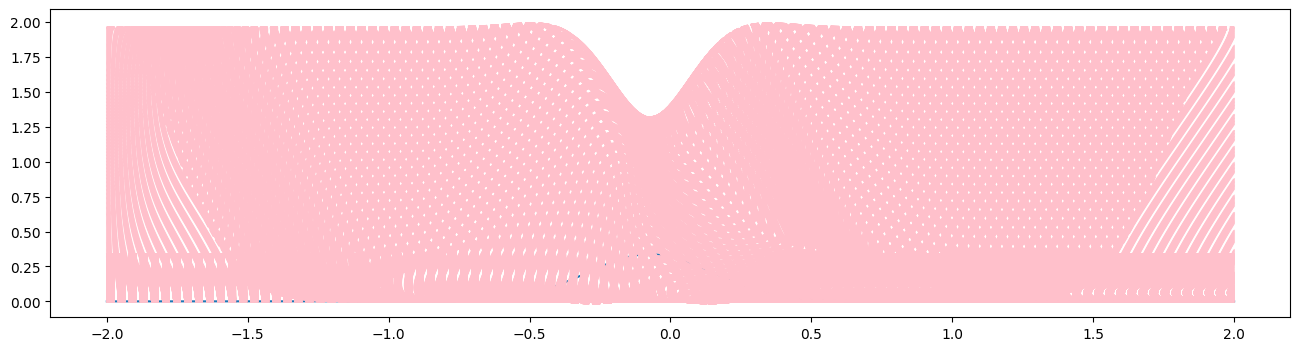

In [ ]:
for ii in [1,2,5,10,50]:
  # You can change gamma and sigma values to analyze their influence over the predictive distribution
  plot_kernel_predictive_distribution(X[:ii], Y[:ii], gamma=10,sigma_n=1)

In this case, two parameters have to be fixed with prior knowledge: $\sigma_n$ and the kernel parameter ($\gamma$ in this RBF kernel case).

#### **Exercise 4**
Analyze the influence of $\gamma$ on the solution.

##### SOLUTION

#### **Exercise 5**

Analyze the influence of noise variance on the solution.

###### SOLUTION

## 3.2 Parameter learning: Evidence Maximization

The final performance of our model depends on the selection of the noise variance ($\sigma_n$) and the kernel parameters (for instance, $\gamma$ in the RBF kernel case). In the case of ML design (see  section "Maximum Likelihood solution"), we maximized the likelihood of the parameters to estimate their values.

Here, one can consider apply a fully Bayesian design by including  prior knowledge (hyperpriors) about the parameters and, then, obtain the predictive distribution by marginalizing over $\bf w$ and the parameters. However, the complete marginalization over all of these variables is analytically intractable.

The common approach consists of setting the hyperparameters to specific values determined by maximizing the marginal likelihood function. In this case, we obtain the **marginal likelihood  (or evidence)** $p({\bf y}|X, \bf\theta)$ as the integral of the likelihood times the prior:

$$ p({\bf y}| X, {\bf\theta} ) = \int p({\bf y}| X, {\bf w}, {\bf\theta} ) p({\bf w} | X, {\bf\theta} ) d {\bf w}$$

where $\bf\theta$ is a vector containing all the parameters to be learnt. As:
$$p({\bf y}| X, {\bf w}, {\bf\theta} ) \sim \mathcal N(\mathbf w^\top \mathbf x,\sigma_n^2) $$
$$ p({\bf w} | X, {\bf\theta} ) = p({\bf w}) \sim \mathcal N(\mathbf 0,\Sigma_p) $$

we can obtain that:
$$ p({\bf y}| X, {\bf\theta} ) \sim  \mathcal N( {\mathbf 0}, K + \sigma_n^2 \mathbf I )$$
Finally, we can maximize the log-marginal likelihood:
$$ \log p({\bf y}| X, {\bf\theta} ) = -\frac{1}{2}{\bf y}^\top \left(  K + \sigma_n^2 \mathbf I\right)^{-1} {\bf y} -\frac{1}{2} \log |  K + \sigma_n^2 \mathbf I| -\frac{N}{2} \log 2\pi$$
respect to $\theta$ to obtain the ML estimation of the parameters. Note that $\theta$ contains the kernel parameters and $\sigma_n$.


#### **Exercise 6**

Now we are going to select the values of gamma and sigma_n by maximizing the marginal likelihood. As this maximization will have to be done with some gradient descent algorithm, we will use pytorch and its optimizers for this purpose.

We will start by designing a pytorch class that allows us to calculate the negative log-marginal likelihood (negative because pytorch minimizes functions and we need to maximize the marginal likelihood) and that has gamma and sigma_n as parameters, for this we complete the following code. Later, use the next cell to check that ypur implementation works!

#### SOLUTION

In [ ]:
import torch
import torch.optim as optim
import math

class MarginalLikelihood(torch.nn.Module) :
  def __init__(self):
    super().__init__()
    self.sigma_n = torch.nn.Parameter(torch.tensor(0.1))  # Initial values of the parameters
    self.gamma = torch.nn.Parameter(torch.tensor(1.0)) # Initial values of the parameters

  def forward(self, X, Y):
    # Computation of the RBF kernel
    gamma=torch.clamb(self.gamma,min=0)
    sigma=torch.clamb(self.sigma,min=0)
    K = torch.exp(-self.gamma * torch.cdist(X, X))
    # Now, define here the computation of the marginal_likelihood
    # <SOL>
    N = X.shape[0]
    K = K + self.sigma_n**2 * torch.eye(N)  # Add noise to the diagonal
    K_inv = torch.inverse(K)
    log_det_K = torch.log(torch.det(K))
    mahalanobis = Y.t() @ K_inv @ Y

    # Marginal likelihood formula
    marginal_likelihood = -0.5 * (log_det_K + mahalanobis + N * torch.log(2 * torch.tensor(math.pi)))



    # </SOL>
    return -marginal_likelihood



In [ ]:
myMarginalLikelihood = MarginalLikelihood()
X_torch = torch.tensor(X)
Y_torch = torch.tensor(Y).double()
negmarginallikelihood = myMarginalLikelihood(X_torch,Y_torch)
print(negmarginallikelihood.item())
# The expected result is negmarginallikelihood = 2193.2225

-2042.3668578016157


Now, let's use this object into an optimization process to obtain the optimum values of gamma and sigma_n. Just run the next cell codes for this purpose.

In [ ]:
# Check the parameters of the model to be optimized
[i for i in myMarginalLikelihood.named_parameters()]

[('sigma_n',
  Parameter containing:
  tensor(0.1000, requires_grad=True)),
 ('gamma',
  Parameter containing:
  tensor(1., requires_grad=True))]

In [ ]:
optimizer = optim.Adam(myMarginalLikelihood.parameters(), lr=0.1)

training_iter=5000
for iter in range(training_iter):
  optimizer.zero_grad()
  loss = myMarginalLikelihood(X_torch,Y_torch)
  loss.backward()
  optimizer.step()
  if iter%500 == 0:
    print('Iter %d/%d - Loss: %.3f   gamma: %.3f   noise: %.3f' % (
          iter + 1, training_iter, loss.item(),
          myMarginalLikelihood.gamma.item(),
          myMarginalLikelihood.sigma_n.item()
    ))

Iter 1/5000 - Loss: -2042.367   gamma: 0.900   noise: 0.000
Iter 501/5000 - Loss: 951.227   gamma: -0.759   noise: -0.501
Iter 1001/5000 - Loss: 919.666   gamma: -0.760   noise: -0.500
Iter 1501/5000 - Loss: 879.283   gamma: -0.760   noise: -0.500
Iter 2001/5000 - Loss: 832.807   gamma: -0.761   noise: -0.500
Iter 2501/5000 - Loss: 782.688   gamma: -0.761   noise: -0.500
Iter 3001/5000 - Loss: 730.583   gamma: -0.762   noise: -0.500
Iter 3501/5000 - Loss: 678.228   gamma: -0.763   noise: -0.499
Iter 4001/5000 - Loss: 626.605   gamma: -0.764   noise: -0.499
Iter 4501/5000 - Loss: 576.399   gamma: -0.765   noise: -0.499


And, finally, let's plot the predictive distribution for the estimated parameters.

ValueError: ignored

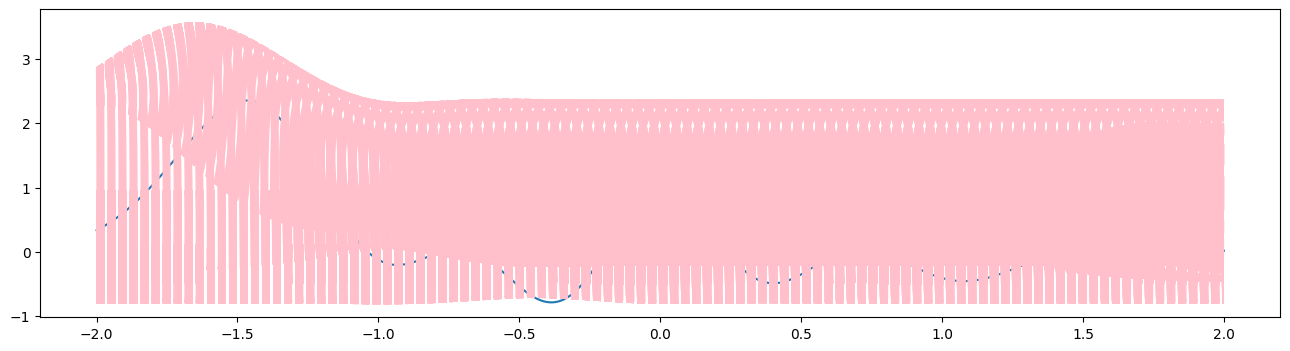

In [ ]:
plot_kernel_predictive_distribution(np.array(X), np.array(Y), gamma=5,sigma_n=0.8)